# Проект: промышленность

**Imports**

In [1]:
!pip install missingno -q

In [2]:
import os

import pandas as pd
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error as mae
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

## Загрузка данных

In [3]:
# функция try-except для загрузки рабочих файлов

def load_csv_files(folder_path_pc, folder_path_ypr, file_names):
    
    dataframes = {}
    file_names = []
    
    for file in filenames:
        try:
            file_key = os.path.splitext(file)[0]
            file_path = os.path.join(folder_path_pc, file)
            df = pd.read_csv(file_path)
            dataframes[file_key] = df
            file_names.append(file_key)
        except:
            file_key = os.path.splitext(file)[0]
            file_path = os.path.join(folder_path_ypr, file)
            df = pd.read_csv(file_path)
            dataframes[file_key] = df
            file_names.append(file_key)
        
    return dataframes, file_names

folder_path_pc = 'C:/Users/zephy/#Final_project/'
folder_path_ypr = 'https://code.s3.yandex.net/datasets/'
filenames = ['data_arc_new.csv', 'data_bulk_new.csv', 'data_bulk_time_new.csv',
             'data_gas_new.csv', 'data_temp_new.csv', 'data_wire_new.csv', 'data_wire_time_new.csv']
dataframes, file_names = load_csv_files(folder_path_pc, folder_path_ypr, filenames)
print(f'Количество датафреймов в словаре "dataframes": {len(dataframes)}')
print(f'Названия датафреймов: {file_names}')

Количество датафреймов в словаре "dataframes": 7
Названия датафреймов: ['data_arc_new', 'data_bulk_new', 'data_bulk_time_new', 'data_gas_new', 'data_temp_new', 'data_wire_new', 'data_wire_time_new']


**data_arc_new** - данные об электродах

In [4]:
print(file_names[0])

data_arc_new


In [5]:
data_arc_new = dataframes[file_names[0]]
data_arc_new.head()

,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.305130,0.211253
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.765658,0.477438
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.580313,0.430460
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,0.518496,0.379979
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.867133,0.643691


In [6]:
data_arc_new.shape

(14876, 5)

In [7]:
data_arc_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14876 entries, 0 to 14875
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   key                   14876 non-null  int64  
 1   Начало нагрева дугой  14876 non-null  object 
 2   Конец нагрева дугой   14876 non-null  object 
 3   Активная мощность     14876 non-null  float64
 4   Реактивная мощность   14876 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 581.2+ KB


In [8]:
data_arc_new.describe()

,key,Активная мощность,Реактивная мощность
count,14876.000000,14876.000000,14876.000000
mean,1615.220422,0.662752,0.438986
std,934.571502,0.258885,5.873485
min,1.000000,0.223120,-715.479924
25%,806.000000,0.467115,0.337175
50%,1617.000000,0.599587,0.441639
75%,2429.000000,0.830070,0.608201
max,3241.000000,1.463773,1.270284


**data_bulk_new** - данные о подаче сыпучих материалов (объём)

In [9]:
print(file_names[1])

data_bulk_new


In [10]:
data_bulk_new = dataframes[file_names[1]]
data_bulk_new.head()

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,150.0,154.0
1,2,NaN,NaN,NaN,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,149.0,154.0
2,3,NaN,NaN,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,205.0,NaN,152.0,153.0
3,4,NaN,NaN,NaN,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207.0,NaN,153.0,154.0
4,5,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.0,NaN,151.0,152.0


In [11]:
data_bulk_new.shape

(3129, 16)

In [12]:
data_bulk_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   key      3129 non-null   int64  
 1   Bulk 1   252 non-null    float64
 2   Bulk 2   22 non-null     float64
 3   Bulk 3   1298 non-null   float64
 4   Bulk 4   1014 non-null   float64
 5   Bulk 5   77 non-null     float64
 6   Bulk 6   576 non-null    float64
 7   Bulk 7   25 non-null     float64
 8   Bulk 8   1 non-null      float64
 9   Bulk 9   19 non-null     float64
 10  Bulk 10  176 non-null    float64
 11  Bulk 11  177 non-null    float64
 12  Bulk 12  2450 non-null   float64
 13  Bulk 13  18 non-null     float64
 14  Bulk 14  2806 non-null   float64
 15  Bulk 15  2248 non-null   float64
dtypes: float64(15), int64(1)
memory usage: 391.2 KB


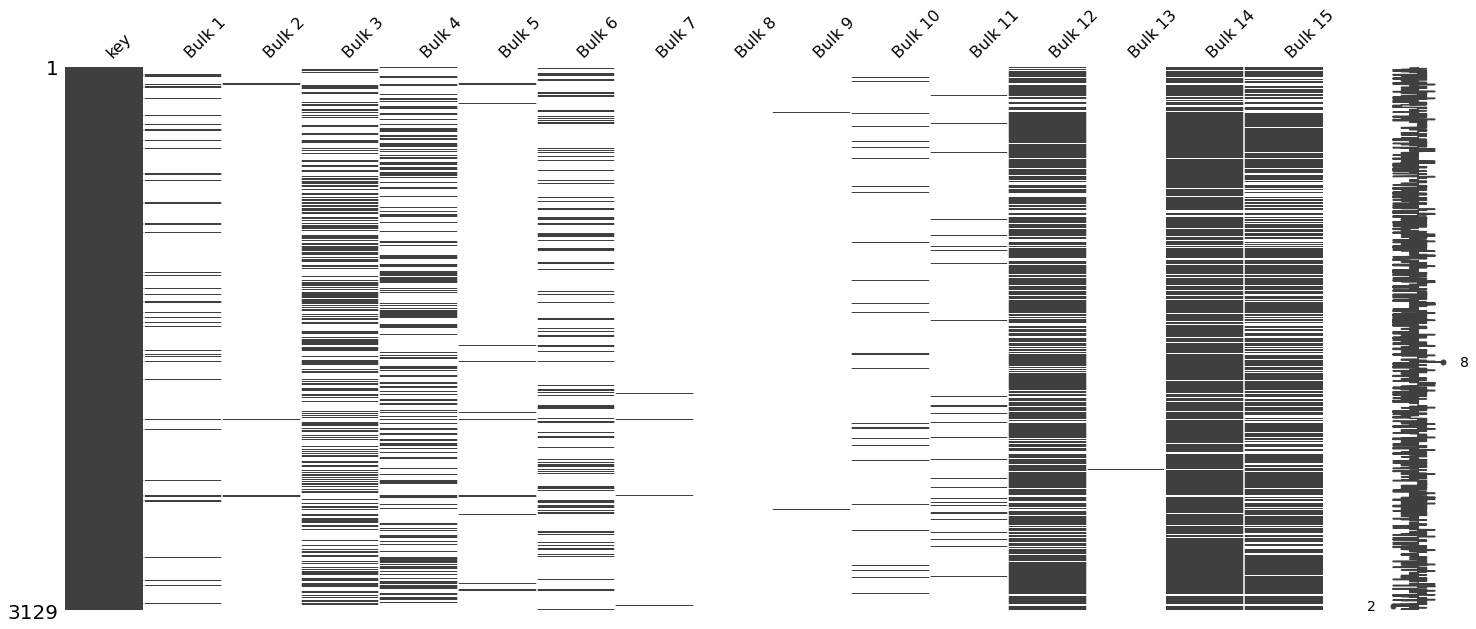

In [13]:
# визуализируем пропущенные значения:

msno.matrix(data_bulk_new);

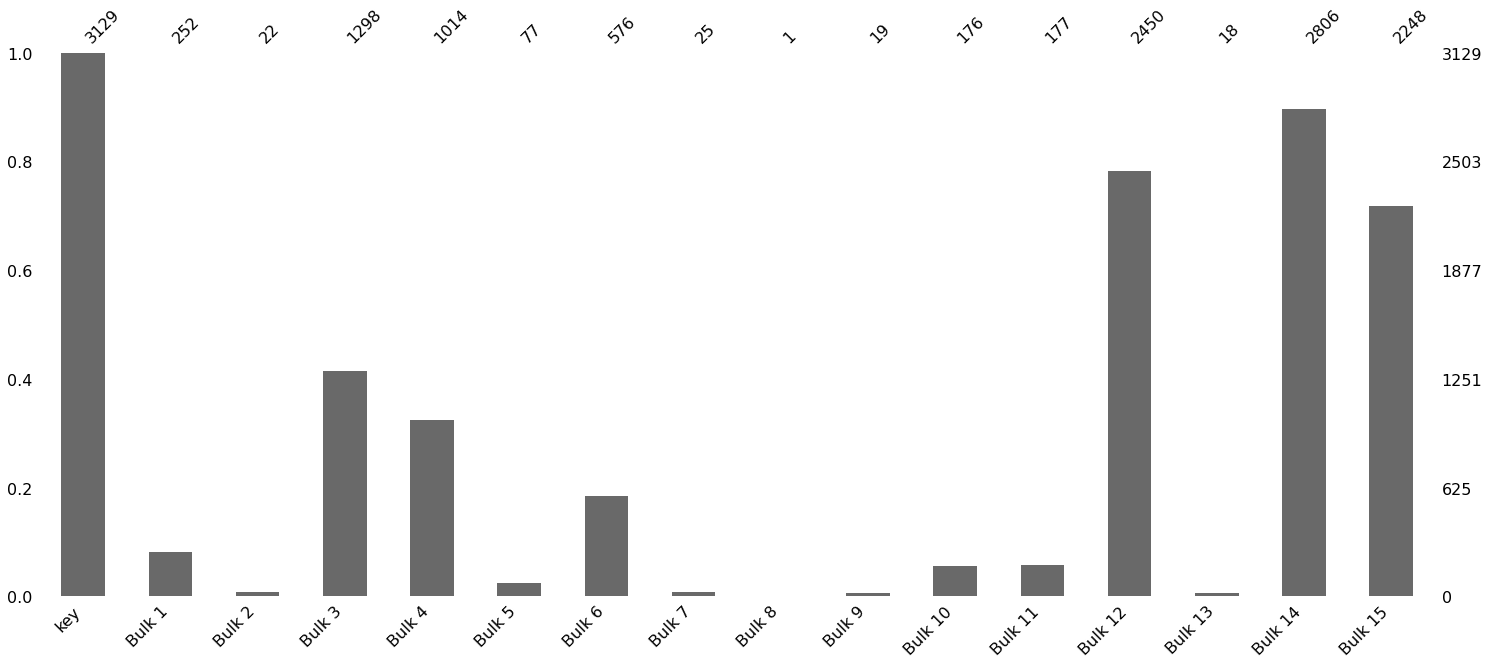

In [14]:
msno.bar(data_bulk_new);

In [15]:
data_bulk_new.describe()

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
count,3129.000000,252.000000,22.000000,1298.000000,1014.000000,77.000000,576.000000,25.000000,1.0,19.000000,176.000000,177.000000,2450.000000,18.000000,2806.000000,2248.000000
mean,1624.383509,39.242063,253.045455,113.879045,104.394477,107.025974,118.925347,305.600000,49.0,76.315789,83.284091,76.819209,260.471020,181.111111,170.284747,160.513345
std,933.337642,18.277654,21.180578,75.483494,48.184126,81.790646,72.057776,191.022904,NaN,21.720581,26.060347,59.655365,120.649269,46.088009,65.868652,51.765319
min,1.000000,10.000000,228.000000,6.000000,12.000000,11.000000,17.000000,47.000000,49.0,63.000000,24.000000,8.000000,53.000000,151.000000,16.000000,1.000000
25%,816.000000,27.000000,242.000000,58.000000,72.000000,70.000000,69.750000,155.000000,49.0,66.000000,64.000000,25.000000,204.000000,153.250000,119.000000,105.000000
50%,1622.000000,31.000000,251.500000,97.500000,102.000000,86.000000,100.000000,298.000000,49.0,68.000000,86.500000,64.000000,208.000000,155.500000,151.000000,160.000000
75%,2431.000000,46.000000,257.750000,152.000000,133.000000,132.000000,157.000000,406.000000,49.0,70.500000,102.000000,106.000000,316.000000,203.500000,205.750000,205.000000
max,3241.000000,185.000000,325.000000,454.000000,281.000000,603.000000,503.000000,772.000000,49.0,147.000000,159.000000,313.000000,1849.000000,305.000000,636.000000,405.000000


**data_bulk_time_new** - данные о подаче сыпучих материалов (время)

In [16]:
print(file_names[2])

data_bulk_time_new


In [17]:
data_bulk_time_new = dataframes[file_names[2]]
data_bulk_time_new.head()

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,2019-05-03 11:28:48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:24:31,NaN,2019-05-03 11:14:50,2019-05-03 11:10:43
1,2,NaN,NaN,NaN,2019-05-03 11:36:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:53:30,NaN,2019-05-03 11:48:37,2019-05-03 11:44:39
2,3,NaN,NaN,NaN,2019-05-03 12:32:39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:27:13,NaN,2019-05-03 12:21:01,2019-05-03 12:16:16
3,4,NaN,NaN,NaN,2019-05-03 12:43:22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:58:00,NaN,2019-05-03 12:51:11,2019-05-03 12:46:36
4,5,NaN,NaN,NaN,2019-05-03 13:30:47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 13:30:47,NaN,2019-05-03 13:34:12,2019-05-03 13:30:47


In [18]:
data_bulk_time_new.shape

(3129, 16)

In [19]:
data_bulk_time_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   key      3129 non-null   int64 
 1   Bulk 1   252 non-null    object
 2   Bulk 2   22 non-null     object
 3   Bulk 3   1298 non-null   object
 4   Bulk 4   1014 non-null   object
 5   Bulk 5   77 non-null     object
 6   Bulk 6   576 non-null    object
 7   Bulk 7   25 non-null     object
 8   Bulk 8   1 non-null      object
 9   Bulk 9   19 non-null     object
 10  Bulk 10  176 non-null    object
 11  Bulk 11  177 non-null    object
 12  Bulk 12  2450 non-null   object
 13  Bulk 13  18 non-null     object
 14  Bulk 14  2806 non-null   object
 15  Bulk 15  2248 non-null   object
dtypes: int64(1), object(15)
memory usage: 391.2+ KB


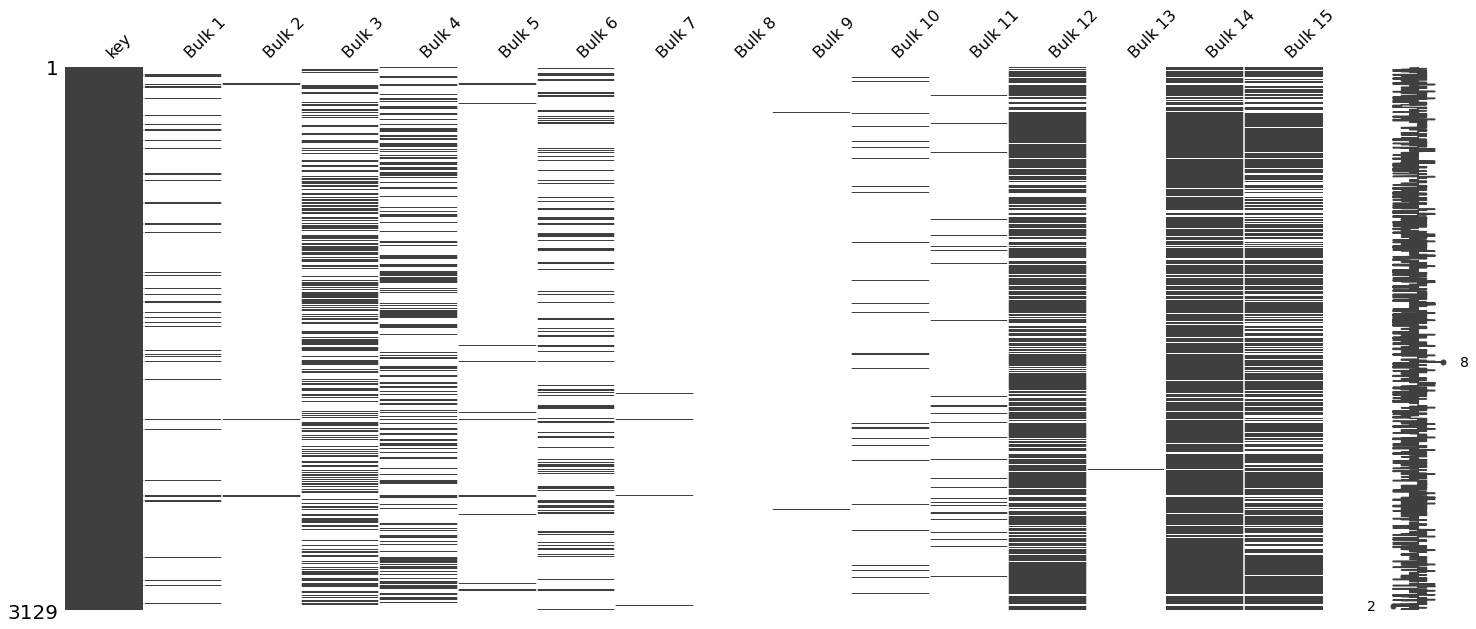

In [20]:
msno.matrix(data_bulk_time_new);

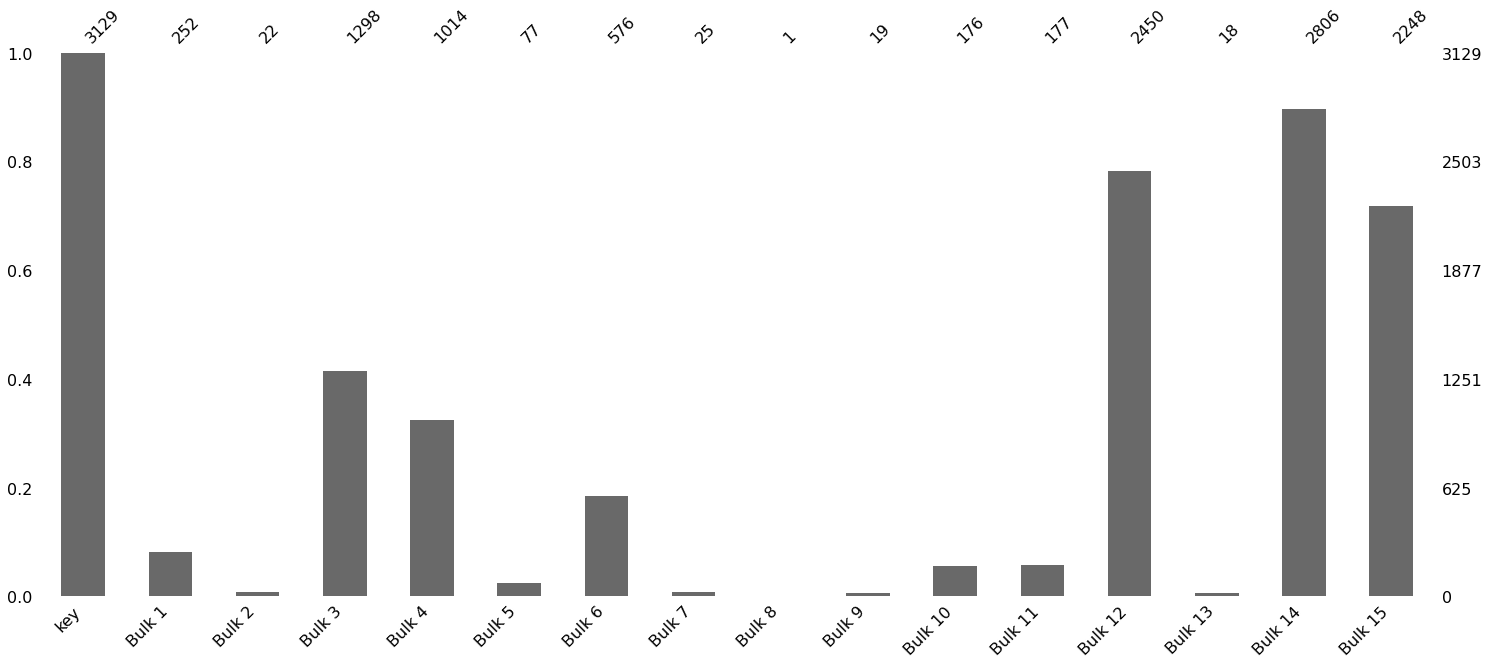

In [21]:
msno.bar(data_bulk_time_new);

In [22]:
data_bulk_time_new.describe()

,key
count,3129.000000
mean,1624.383509
std,933.337642
min,1.000000
25%,816.000000
50%,1622.000000
75%,2431.000000
max,3241.000000


**data_gas_new** - данные о продувке сплава газом

In [23]:
print(file_names[3])

data_gas_new


In [24]:
data_gas_new = dataframes[file_names[3]]
data_gas_new.head()

,key,Газ 1
0,1,29.749986
1,2,12.555561
2,3,28.554793
3,4,18.841219
4,5,5.413692


In [25]:
data_gas_new.shape

(3239, 2)

In [26]:
data_gas_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3239 entries, 0 to 3238
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3239 non-null   int64  
 1   Газ 1   3239 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 50.7 KB


In [27]:
data_gas_new.describe()

,key,Газ 1
count,3239.000000,3239.000000
mean,1621.861377,11.002062
std,935.386334,6.220327
min,1.000000,0.008399
25%,812.500000,7.043089
50%,1622.000000,9.836267
75%,2431.500000,13.769915
max,3241.000000,77.995040


**data_temp_new** - результаты измерения температуры

In [28]:
print(file_names[4])

data_temp_new


In [29]:
data_temp_new = dataframes[file_names[4]]
data_temp_new.head()

,key,Время замера,Температура
0,1,2019-05-03 11:02:04,1571.0
1,1,2019-05-03 11:07:18,1604.0
2,1,2019-05-03 11:11:34,1618.0
3,1,2019-05-03 11:18:04,1601.0
4,1,2019-05-03 11:25:59,1606.0


In [30]:
data_temp_new.shape

(18092, 3)

In [31]:
data_temp_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18092 entries, 0 to 18091
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   key           18092 non-null  int64  
 1   Время замера  18092 non-null  object 
 2   Температура   14665 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 424.2+ KB


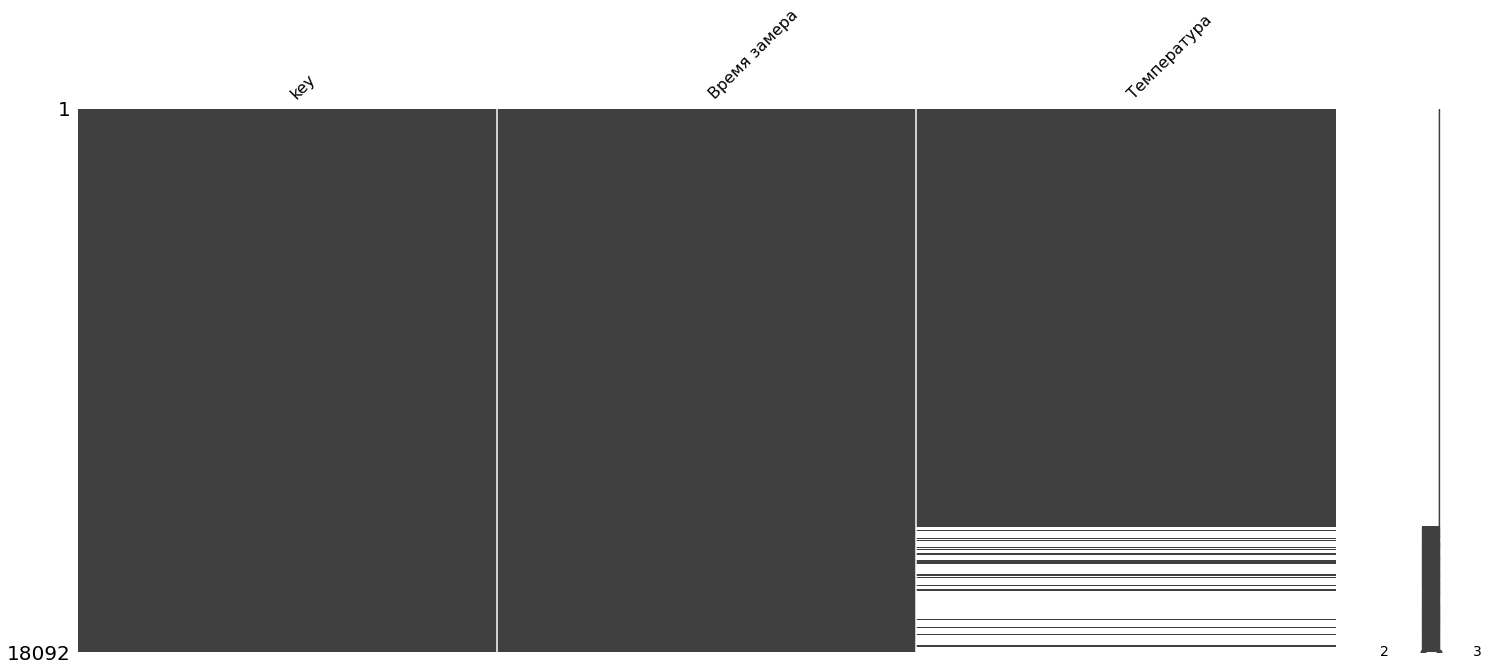

In [32]:
msno.matrix(data_temp_new);

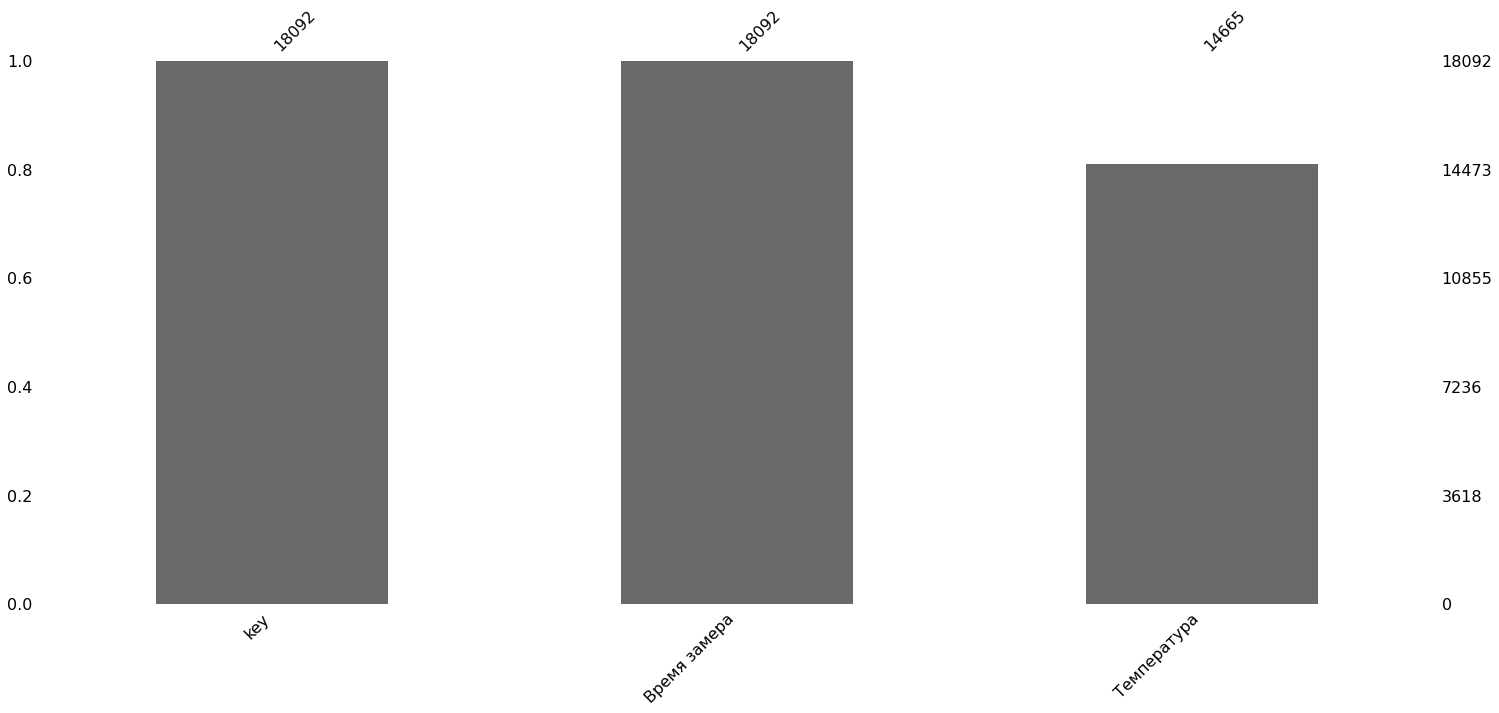

In [33]:
msno.bar(data_temp_new);

In [34]:
data_temp_new.describe()

,key,Температура
count,18092.000000,14665.000000
mean,1616.460977,1590.722741
std,934.641385,20.394381
min,1.000000,1191.000000
25%,807.750000,1580.000000
50%,1618.000000,1590.000000
75%,2429.000000,1599.000000
max,3241.000000,1705.000000


In [35]:
data_temp_new.isna().sum()

key                0
Время замера       0
Температура     3427
dtype: int64

Наблюдаем значительное количество пропусков в замере температуры в ковше, учтем это в дальнейшем исследовательском анализе.

**data_wire_new** - данные о проволочных материалах (объём)

In [36]:
print(file_names[5])

data_wire_new


In [37]:
data_wire_new = dataframes['data_wire_new']
data_wire_new.head()

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,60.059998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,96.052315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,91.160157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,89.063515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,89.238236,9.11456,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
data_wire_new.shape

(3081, 10)

In [39]:
data_wire_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3081 non-null   int64  
 1   Wire 1  3055 non-null   float64
 2   Wire 2  1079 non-null   float64
 3   Wire 3  63 non-null     float64
 4   Wire 4  14 non-null     float64
 5   Wire 5  1 non-null      float64
 6   Wire 6  73 non-null     float64
 7   Wire 7  11 non-null     float64
 8   Wire 8  19 non-null     float64
 9   Wire 9  29 non-null     float64
dtypes: float64(9), int64(1)
memory usage: 240.8 KB


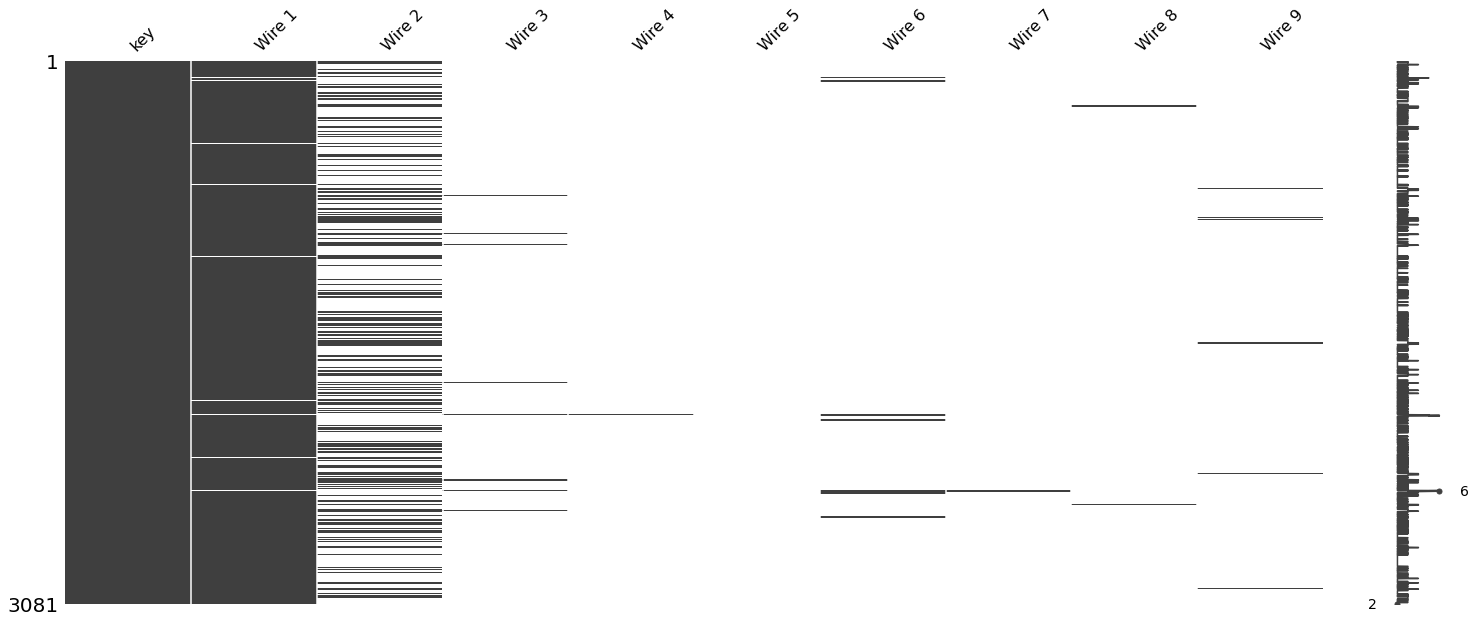

In [40]:
msno.matrix(data_wire_new);

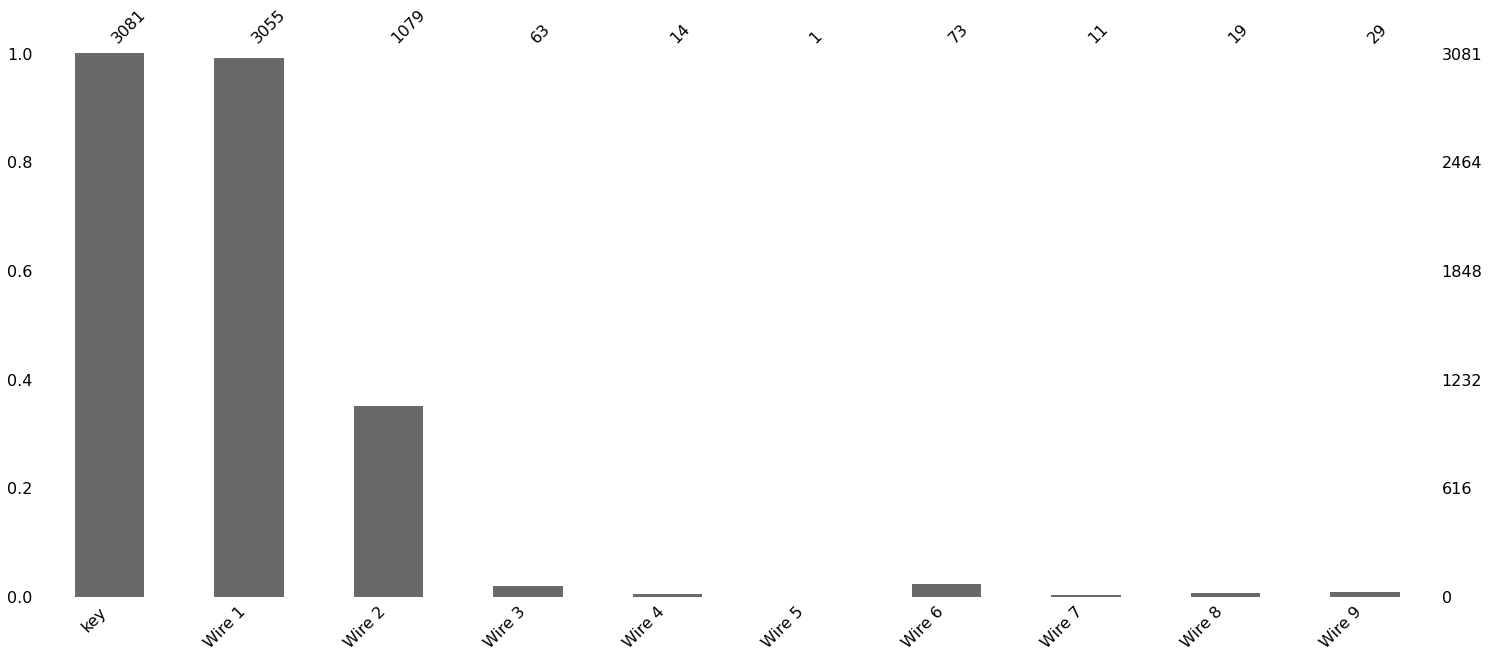

In [41]:
msno.bar(data_wire_new);

In [42]:
data_wire_new.describe()

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
count,3081.000000,3055.000000,1079.000000,63.000000,14.000000,1.000,73.000000,11.000000,19.000000,29.000000
mean,1623.426485,100.895853,50.577323,189.482681,57.442841,15.132,48.016974,10.039007,53.625193,34.155752
std,932.996726,42.012518,39.320216,99.513444,28.824667,NaN,33.919845,8.610584,16.881728,19.931616
min,1.000000,1.918800,0.030160,0.144144,24.148801,15.132,0.034320,0.234208,45.076721,4.622800
25%,823.000000,72.115684,20.193680,95.135044,40.807002,15.132,25.053600,6.762756,46.094879,22.058401
50%,1619.000000,100.158234,40.142956,235.194977,45.234282,15.132,42.076324,9.017009,46.279999,30.066399
75%,2434.000000,126.060483,70.227558,276.252014,76.124619,15.132,64.212723,11.886057,48.089603,43.862003
max,3241.000000,330.314424,282.780152,385.008668,113.231044,15.132,180.454575,32.847674,102.762401,90.053604


**data_wire_time_new** - данные о проволочных материалах (время)

In [43]:
print(file_names[6])

data_wire_time_new


In [44]:
data_wire_time_new = dataframes['data_wire_time_new']
data_wire_time_new.head()

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,2019-05-03 11:06:19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2019-05-03 11:36:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2019-05-03 12:11:46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2019-05-03 12:43:22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2019-05-03 13:20:44,2019-05-03 13:15:34,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
data_wire_time_new.shape

(3081, 10)

In [46]:
data_wire_time_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   key     3081 non-null   int64 
 1   Wire 1  3055 non-null   object
 2   Wire 2  1079 non-null   object
 3   Wire 3  63 non-null     object
 4   Wire 4  14 non-null     object
 5   Wire 5  1 non-null      object
 6   Wire 6  73 non-null     object
 7   Wire 7  11 non-null     object
 8   Wire 8  19 non-null     object
 9   Wire 9  29 non-null     object
dtypes: int64(1), object(9)
memory usage: 240.8+ KB


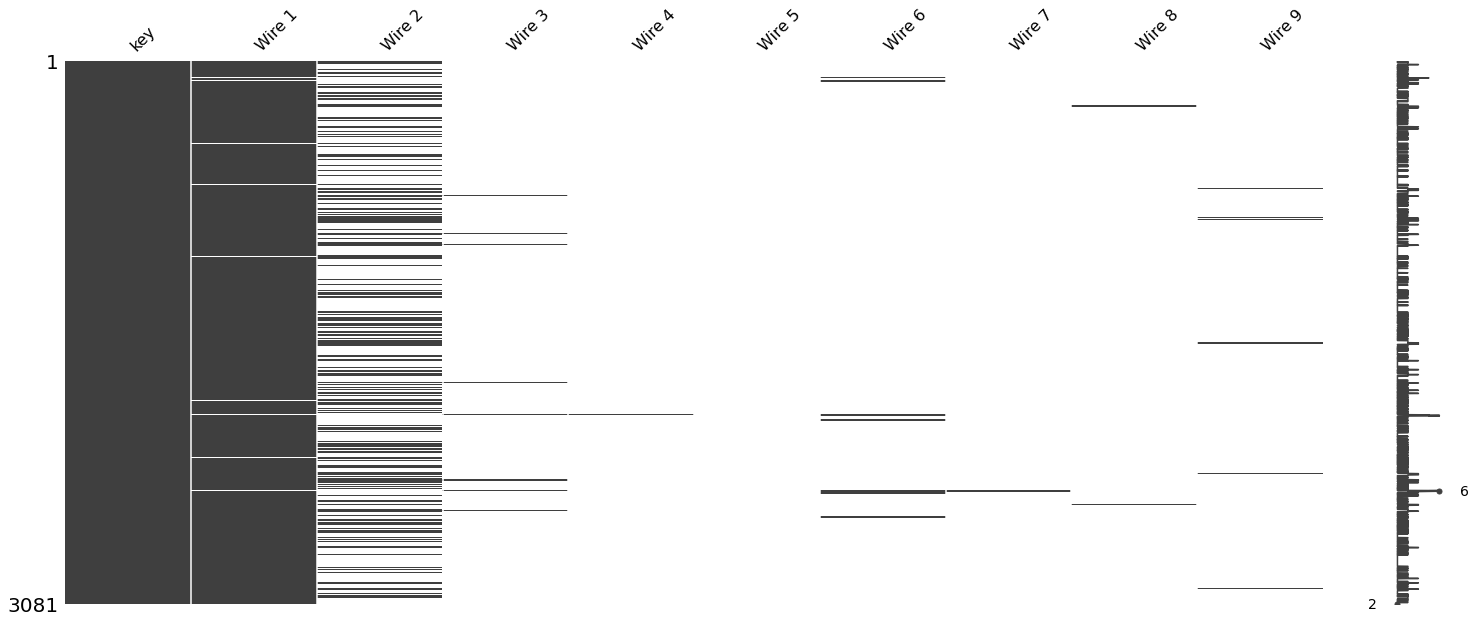

In [47]:
msno.matrix(data_wire_time_new);

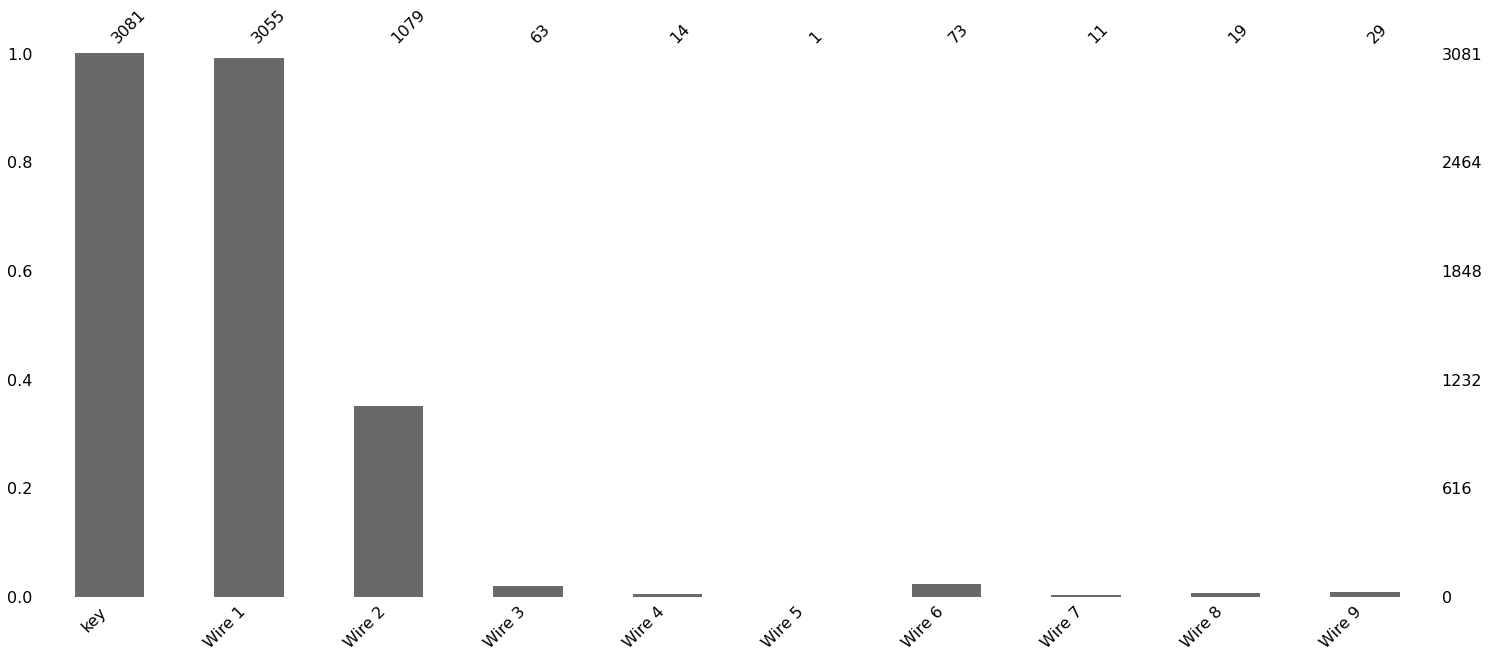

In [48]:
msno.bar(data_wire_time_new);

In [49]:
data_wire_time_new.describe()

,key
count,3081.000000
mean,1623.426485
std,932.996726
min,1.000000
25%,823.000000
50%,1619.000000
75%,2434.000000
max,3241.000000


**Вывод**

Произведена загрузка данных, выполнен их первичный осмотр.  
Данные читаются корректно. Выявлено много пропущенных значений.

## Исследовательский анализ и предобработка данных

In [50]:
file_names

['data_arc_new',
 'data_bulk_new',
 'data_bulk_time_new',
 'data_gas_new',
 'data_temp_new',
 'data_wire_new',
 'data_wire_time_new']

In [51]:
data_arc_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14876 entries, 0 to 14875
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   key                   14876 non-null  int64  
 1   Начало нагрева дугой  14876 non-null  object 
 2   Конец нагрева дугой   14876 non-null  object 
 3   Активная мощность     14876 non-null  float64
 4   Реактивная мощность   14876 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 581.2+ KB


In [52]:
data_arc_new['Начало нагрева дугой'] = pd.to_datetime(data_arc_new['Начало нагрева дугой'])
data_arc_new['Конец нагрева дугой'] = pd.to_datetime(data_arc_new['Конец нагрева дугой'])

In [53]:
data_arc_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14876 entries, 0 to 14875
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   key                   14876 non-null  int64         
 1   Начало нагрева дугой  14876 non-null  datetime64[ns]
 2   Конец нагрева дугой   14876 non-null  datetime64[ns]
 3   Активная мощность     14876 non-null  float64       
 4   Реактивная мощность   14876 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(1)
memory usage: 581.2 KB


**Рассмотрим распределение данных на предмет аномальных значений**

In [54]:
def boxplot_feature(df, feature, title):
    fig = plt.subplots(figsize=(20, 5))
    df.boxplot(feature, vert=False, patch_artist=True, fontsize=15)
    plt.title(title, fontsize=20, fontweight="bold")
    plt.yticks(rotation=60, fontsize=15)
    plt.show()

**Активная мощность** — это полезная часть мощности, та часть, которая определяет прямое преобразования электрической энергии в другие необходимые виды энергии. Фактически, активная мощность определяет скорость полезного потребления энергии.

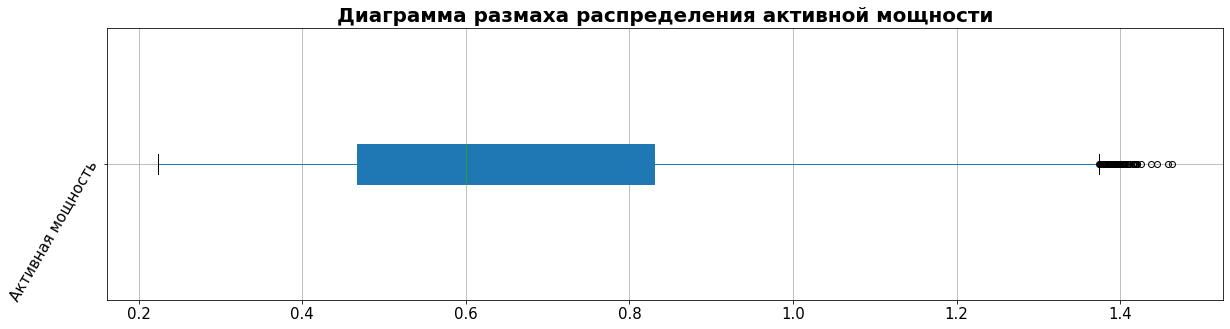

In [55]:
file=data_arc_new
column='Активная мощность'
title='Диаграмма размаха распределения активной мощности'
boxplot_feature(file, column, title)

**Реактивная мощность** — мощность определяемая электромагнитными полями, образующимися в процессе работы приборов.  
Реактивная мощность, как правило, является «вредной» или «паразитной». Реактивная мощность определяется характером нагрузки. 

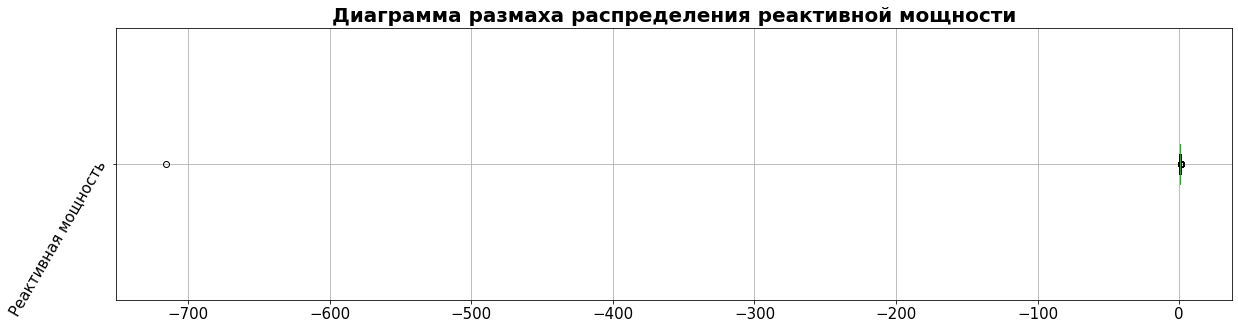

In [56]:
file=data_arc_new
column='Реактивная мощность'
title='Диаграмма размаха распределения реактивной мощности'
boxplot_feature(file, column, title)

In [57]:
data_arc_new[data_arc_new['Реактивная мощность'] < 0]

,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
9780,2116,2019-07-28 02:22:08,2019-07-28 02:23:57,0.705344,-715.479924


In [58]:
# Значение мощности не может быть отрицательным.

print(len(data_arc_new[data_arc_new['Реактивная мощность'] < 0]))

1


In [59]:
# Рассмотрим все значения партии 2116:

data_arc_new.query('key == 2116')

,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
9778,2116,2019-07-28 02:07:12,2019-07-28 02:09:14,0.787549,0.693881
9779,2116,2019-07-28 02:13:10,2019-07-28 02:15:25,0.580263,0.411498
9780,2116,2019-07-28 02:22:08,2019-07-28 02:23:57,0.705344,-715.479924
9781,2116,2019-07-28 02:29:11,2019-07-28 02:30:18,0.563641,0.408513


In [60]:
# Проинтерполируем заменяемое значение выброса (Реактивная мощность = -715.48)

df_2116 = data_arc_new.query('key == 2116')

df_2116['Реактивная мощность'] = df_2116['Реактивная мощность'].apply(lambda x: x if x > 0 else None)

df_2116[['Активная мощность',
         'Реактивная мощность']] = df_2116[['Активная мощность',
                                            'Реактивная мощность']].apply(lambda group: group.interpolate(method='linear'))
print(df_2116)

       key Начало нагрева дугой Конец нагрева дугой  Активная мощность  \
9778  2116  2019-07-28 02:07:12 2019-07-28 02:09:14           0.787549   
9779  2116  2019-07-28 02:13:10 2019-07-28 02:15:25           0.580263   
9780  2116  2019-07-28 02:22:08 2019-07-28 02:23:57           0.705344   
9781  2116  2019-07-28 02:29:11 2019-07-28 02:30:18           0.563641   

      Реактивная мощность  
9778             0.693881  
9779             0.411498  
9780             0.410006  
9781             0.408513  


/tmp/ipykernel_153/78244250.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2116['Реактивная мощность'] = df_2116['Реактивная мощность'].apply(lambda x: x if x > 0 else None)
/opt/conda/lib/python3.9/site-packages/pandas/core/frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [61]:
# Заменяем аномальное значение полученным от интерполяции

data_arc_new.loc[9780, 'Реактивная мощность'] = 0.410006

# Проверяем

data_arc_new.query('key == 2116')

,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
9778,2116,2019-07-28 02:07:12,2019-07-28 02:09:14,0.787549,0.693881
9779,2116,2019-07-28 02:13:10,2019-07-28 02:15:25,0.580263,0.411498
9780,2116,2019-07-28 02:22:08,2019-07-28 02:23:57,0.705344,0.410006
9781,2116,2019-07-28 02:29:11,2019-07-28 02:30:18,0.563641,0.408513


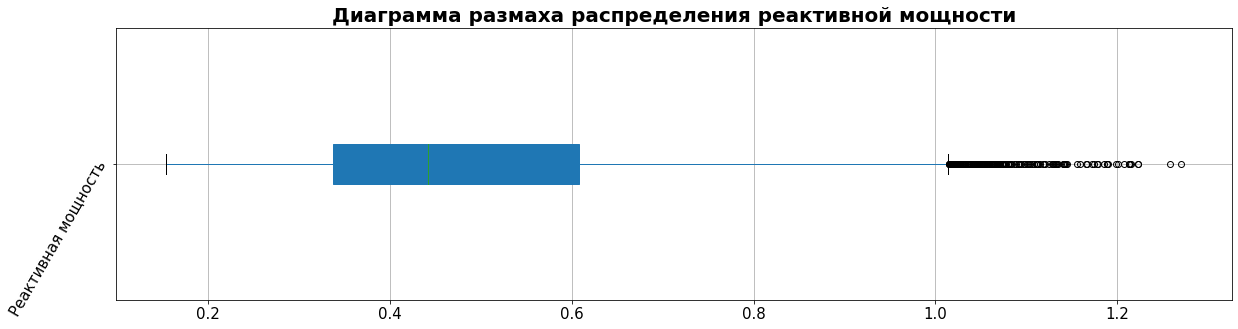

In [62]:
file=data_arc_new
column='Реактивная мощность'
title='Диаграмма размаха распределения реактивной мощности'
boxplot_feature(file, column, title)

**Полная мощность** определяется как векторное сложение величин **активной (P)** и **реактивной (Q)** мощностей:  
`S = sqrt(P^2 + Q^2)`

In [63]:
# Добавим дополнительные признаки

data_arc_new['Полная мощность'] = (data_arc_new['Активная мощность']**2 + data_arc_new['Реактивная мощность']**2)**0.5
data_arc_new['Время нагрева дугой'] = (data_arc_new['Конец нагрева дугой'] \
                                       - data_arc_new['Начало нагрева дугой']).astype('timedelta64[s]').astype(int)
data_arc_new['Работа'] = data_arc_new['Полная мощность'] * data_arc_new['Время нагрева дугой']
data_arc_new.head()

,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность,Полная мощность,Время нагрева дугой,Работа
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.305130,0.211253,0.371123,228,84.616003
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.765658,0.477438,0.902319,185,166.928978
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.580313,0.430460,0.722536,172,124.276277
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,0.518496,0.379979,0.642824,365,234.630603
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.867133,0.643691,1.079934,148,159.830252


In [64]:
len(data_arc_new['Время нагрева дугой'])

14876

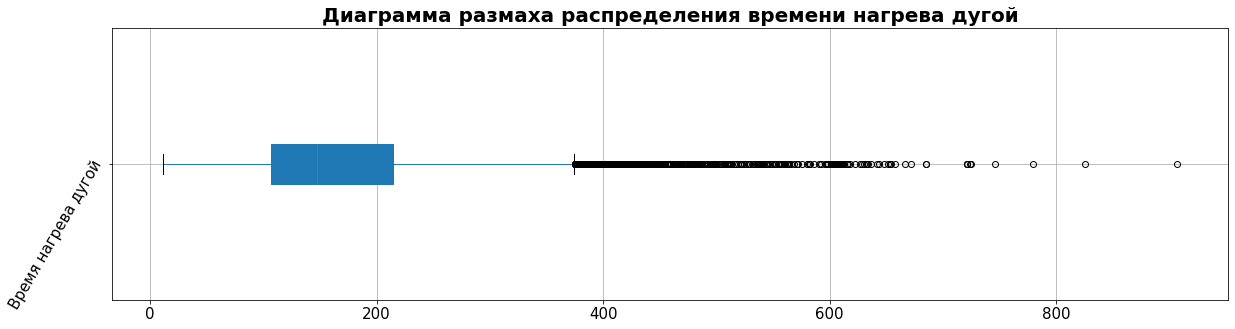

In [65]:
file=data_arc_new
column='Время нагрева дугой'
title='Диаграмма размаха распределения времени нагрева дугой'
boxplot_feature(file, column, title)

Рассчитаем среднее значение мощности для каждой партии.  
Посчитаем затраченную электроэнергию (работу) суммировав затраты на каждую партию.

In [66]:
arc_columns = {
    'key' : 'count', 
    'Начало нагрева дугой' : 'min',
    'Конец нагрева дугой' : 'max',
    'Активная мощность' : 'mean',
    'Реактивная мощность' : 'mean',
    'Полная мощность' : 'mean',
    'Время нагрева дугой' : 'sum',
    'Работа' : 'sum'
}
arc_group = data_arc_new.groupby('key').agg(arc_columns).rename(columns={'key':'Количество циклов нагрева'})

In [67]:
arc_time = arc_group[['Начало нагрева дугой', 'Конец нагрева дугой']]
display(arc_time.head())

,Начало нагрева дугой,Конец нагрева дугой
key,,
1,2019-05-03 11:02:14,2019-05-03 11:28:37
2,2019-05-03 11:34:14,2019-05-03 11:53:18
3,2019-05-03 12:06:54,2019-05-03 12:32:19
4,2019-05-03 12:39:37,2019-05-03 12:57:50
5,2019-05-03 13:11:13,2019-05-03 13:33:55


In [68]:
arc_group.drop(columns=['Начало нагрева дугой', 'Конец нагрева дугой'], axis=1, inplace=True)
arc_group.head()

,Количество циклов нагрева,Активная мощность,Реактивная мощность,Полная мощность,Время нагрева дугой,Работа
key,,,,,,
1,5,0.607346,0.428564,0.743747,1098,770.282114
2,4,0.534852,0.363339,0.647087,811,481.760005
3,5,0.812728,0.587491,1.003845,655,722.837668
4,4,0.676622,0.514248,0.850010,741,683.455597
5,4,0.563238,0.421998,0.704245,869,512.169934


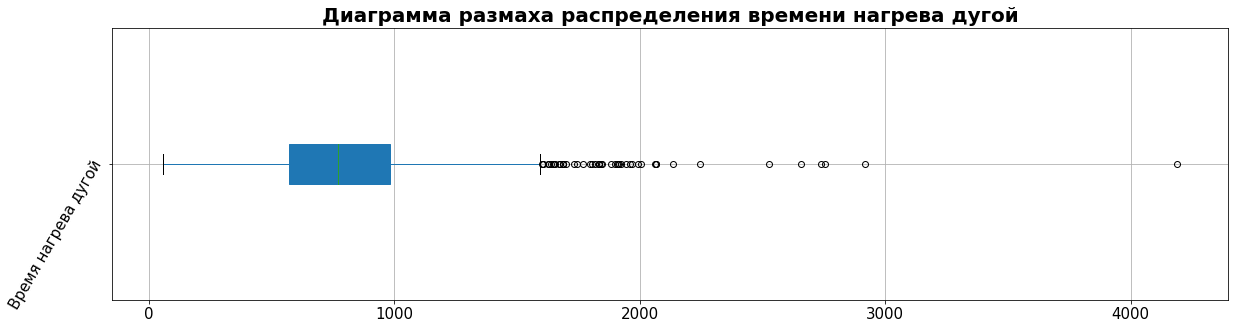

In [69]:
file=arc_group
column='Время нагрева дугой'
title='Диаграмма размаха распределения времени нагрева дугой'
boxplot_feature(file, column, title)

In [70]:
arc_group['Время нагрева дугой'].describe()

count    3214.000000
mean      794.579029
std       332.448622
min        57.000000
25%       571.000000
50%       770.000000
75%       983.000000
max      4189.000000
Name: Время нагрева дугой, dtype: float64

In [71]:
print(arc_group['Время нагрева дугой'].quantile(0.995))

1924.4799999999996


Менее 0.5 % значений времени нагрева дугой партии превышает 2000 секунд.
Рассмотрим эти аномалии подробее.

In [72]:
arc_group[arc_group['Время нагрева дугой']>2000]

,Количество циклов нагрева,Активная мощность,Реактивная мощность,Полная мощность,Время нагрева дугой,Работа
key,,,,,,
44,12,0.608250,0.435102,0.748429,2063,1393.802417
45,10,0.627228,0.456435,0.776791,2136,1569.947614
46,13,0.706174,0.542457,0.891672,2919,2306.073920
322,13,0.685754,0.504934,0.851966,2658,2026.007227
638,11,0.661000,0.452892,0.801596,2067,1654.779561
813,9,0.677701,0.496444,0.840545,2247,1992.990539
1513,15,0.775490,0.571533,0.964436,2526,2380.879281
1689,15,0.825042,0.596603,1.019218,4189,4546.405812
1880,11,0.559006,0.387556,0.680447,2755,1851.427463


In [73]:
arc_group['Количество циклов нагрева'].describe()

count    3214.000000
mean        4.628500
std         1.608647
min         1.000000
25%         4.000000
50%         4.000000
75%         6.000000
max        16.000000
Name: Количество циклов нагрева, dtype: float64

In [74]:
arc_group[arc_group['Количество циклов нагрева']>10]

,Количество циклов нагрева,Активная мощность,Реактивная мощность,Полная мощность,Время нагрева дугой,Работа
key,,,,,,
44,12,0.608250,0.435102,0.748429,2063,1393.802417
46,13,0.706174,0.542457,0.891672,2919,2306.073920
322,13,0.685754,0.504934,0.851966,2658,2026.007227
638,11,0.661000,0.452892,0.801596,2067,1654.779561
1513,15,0.775490,0.571533,0.964436,2526,2380.879281
1689,15,0.825042,0.596603,1.019218,4189,4546.405812
1829,12,0.740212,0.528188,0.909889,1505,1332.319417
1880,11,0.559006,0.387556,0.680447,2755,1851.427463
1958,11,0.628680,0.494629,0.801079,1834,1421.929905


Трем из четырех партий потребовалось не более 6 циклов нагрева и до 983 секунд.   
В единичных случаях количество циклов превысило 10, а время нагрева дугой - 2000 секунд.    
Значения партии №1689 явно выбиваются из общей картины, но подобные статистические аномалии могут быть полезны для устойчивости работы модели.

In [75]:
def hist_feauture(df, column, title, bins, xlabel, ylabel):
    ax = df[column].plot(kind='hist', bins=bins, grid=True, figsize=(20, 5))
    ax.set_title(title, fontsize=15, fontweight="bold")
    ax.set_xlabel(xlabel, fontsize=15)
    ax.set_ylabel(ylabel, fontsize=15)
    
    plt.show()

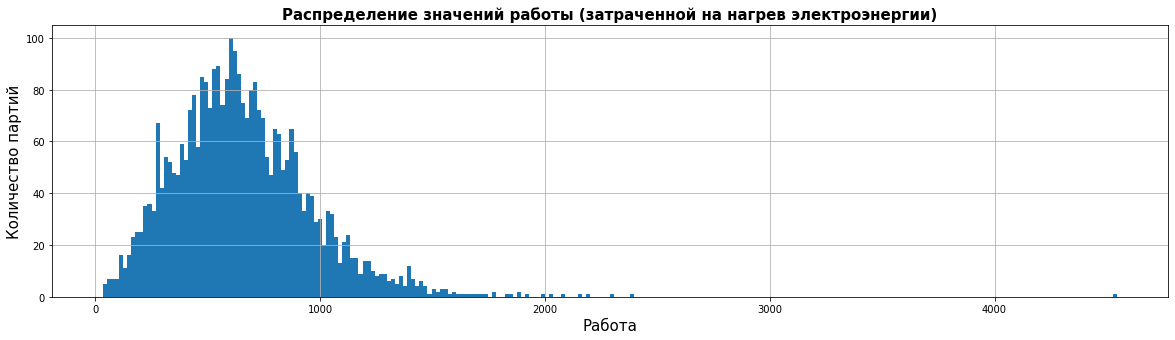

In [76]:
df = arc_group
column = 'Работа'
title = 'Распределение значений работы (затраченной на нагрев электроэнергии)'
bins = 250
xlabel = 'Работа'
ylabel = 'Количество партий'
hist_feauture(df, column, title, bins, xlabel, ylabel)

Для подсчета общего объема добавленного сыпучего материала в расплав введем дополнительный признак `Bulk sum`.

In [77]:
data_bulk_new = data_bulk_new.fillna(0)
data_bulk_new['Bulk sum'] = data_bulk_new.sum(axis=1)

In [78]:
display(data_bulk_new.head())

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15,Bulk sum
0,1,0.0,0.0,0.0,43.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,206.0,0.0,150.0,154.0,554.0
1,2,0.0,0.0,0.0,73.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,206.0,0.0,149.0,154.0,584.0
2,3,0.0,0.0,0.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,205.0,0.0,152.0,153.0,547.0
3,4,0.0,0.0,0.0,81.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,207.0,0.0,153.0,154.0,599.0
4,5,0.0,0.0,0.0,78.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,203.0,0.0,151.0,152.0,589.0


Определим время первого и последнего замера температуры.

In [79]:
data_temp_new.head()

,key,Время замера,Температура
0,1,2019-05-03 11:02:04,1571.0
1,1,2019-05-03 11:07:18,1604.0
2,1,2019-05-03 11:11:34,1618.0
3,1,2019-05-03 11:18:04,1601.0
4,1,2019-05-03 11:25:59,1606.0


In [80]:
temp_time = data_temp_new
temp_time['Время начального замера температуры'] = temp_time['Время замера']
temp_time['Время последнего замера температуры'] = temp_time['Время замера']
temp_time_columns = {'Время начального замера температуры' : 'first', 'Время последнего замера температуры' : 'last'}
temp_time_group = temp_time.groupby('key').agg(temp_time_columns)
display(temp_time_group.head())

,Время начального замера температуры,Время последнего замера температуры
key,,
1,2019-05-03 11:02:04,2019-05-03 11:30:38
2,2019-05-03 11:34:04,2019-05-03 11:55:09
3,2019-05-03 12:06:44,2019-05-03 12:35:57
4,2019-05-03 12:39:27,2019-05-03 12:59:47
5,2019-05-03 13:11:03,2019-05-03 13:36:39


In [81]:
temp_time_group.isnull().sum().sum()

0

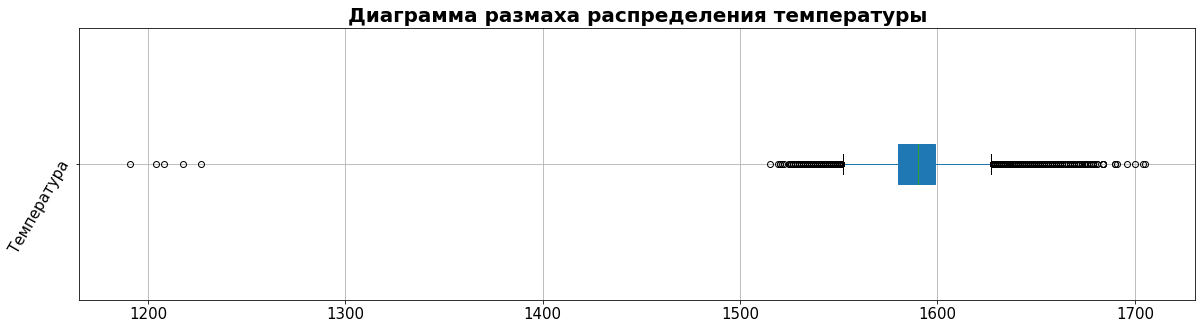

In [82]:
file=data_temp_new
column='Температура'
title='Диаграмма размаха распределения температуры'
boxplot_feature(file, column, title)

Удалим те партии, в которых наблюдались пропуски в замерах температуры. Заменим пропуски в значениях температуры на "0".

In [83]:
data_temp_new = data_temp_new.fillna(0)

In [84]:
data_temp_new.query('key == [2582, 2738, 2795]')

,key,Время замера,Температура,Время начального замера температуры,Время последнего замера температуры
14444,2582,2019-08-13 22:21:01,1590.0,2019-08-13 22:21:01,2019-08-13 22:21:01
14445,2582,2019-08-13 22:48:10,0.0,2019-08-13 22:48:10,2019-08-13 22:48:10
15321,2738,2019-08-19 13:45:18,1621.0,2019-08-19 13:45:18,2019-08-19 13:45:18
15322,2738,2019-08-19 14:23:44,0.0,2019-08-19 14:23:44,2019-08-19 14:23:44
15622,2795,2019-08-21 17:08:31,1617.0,2019-08-21 17:08:31,2019-08-21 17:08:31
15623,2795,2019-08-21 17:44:58,0.0,2019-08-21 17:44:58,2019-08-21 17:44:58


Согласно технологии https://ru.hmaking.com/steel-melting-point/, температура стали не должна опускаться ниже 1400 градусов.  
Удалим те партии, в процессе производства которых температура в ковше опускалась ниже этого значения. В тех партиях, в которых пропуски заменили на "0", минимальное значение температуры будет равно "0". Удалим одновременно и эти партии.

In [85]:
data_temp_new['Начальная температура'] = data_temp_new['Температура']
data_temp_new['Минимальная температура'] = data_temp_new['Температура']
data_temp_new['Окончательная температура'] = data_temp_new['Температура']

data_temp_sorted = data_temp_new.sort_values(by=['key', 'Время замера'])

# Сохраняем реальный последний замер температуры для каждого ключа
data_temp_last = data_temp_sorted.groupby('key').tail(1)

# Для каждого ключа исключаем последний замер для вычисления минимальной температуры
data_temp_excl_last = data_temp_sorted.groupby('key').apply(lambda x: x.iloc[:-1]).reset_index(drop=True)

temp_columns = {
    'Начальная температура': 'first',
    'Минимальная температура': 'min',
}

data_temp_group = data_temp_excl_last.groupby('key').agg(temp_columns).reset_index()

data_temp_group = data_temp_group.merge(
    data_temp_last[['key', 'Температура']].rename(columns={'Температура': 'Окончательная температура'}),
    on='key',
    how='left'
)
data_temp_group = data_temp_group.loc[data_temp_group['Минимальная температура'] > 1400]

data_temp_group['Начальная температура'] = data_temp_group['Начальная температура'].astype(int)
data_temp_group['Минимальная температура'] = data_temp_group['Минимальная температура'].astype(int)
data_temp_group['Окончательная температура'] = data_temp_group['Окончательная температура'].astype(int)

display(data_temp_group.head(10))

,key,Начальная температура,Минимальная температура,Окончательная температура
0,1,1571,1571,1613
1,2,1581,1577,1602
2,3,1596,1596,1599
3,4,1601,1601,1625
4,5,1576,1576,1602
5,6,1543,1543,1596
6,7,1586,1582,1599
7,8,1577,1577,1598
8,9,1587,1586,1592
9,10,1574,1574,1593


In [86]:
data_temp_group[data_temp_group['Окончательная температура'] == 0]

,key,Начальная температура,Минимальная температура,Окончательная температура
2557,2582,1590,1590,0
2712,2738,1621,1621,0
2769,2795,1617,1617,0
2815,2841,1616,1616,0
3000,3026,1623,1623,0
3033,3059,1599,1599,0
3086,3112,1651,1651,0


In [87]:
data_temp_group = data_temp_group[data_temp_group['Окончательная температура'] != 0]

In [88]:
data_temp_group.describe()

,key,Начальная температура,Минимальная температура,Окончательная температура
count,2471.000000,2471.000000,2471.000000,2471.000000
mean,1250.484015,1589.012950,1580.147309,1595.339943
std,720.109488,25.004369,19.786087,16.035215
min,1.000000,1519.000000,1519.000000,1541.000000
25%,628.500000,1572.000000,1569.000000,1587.000000
50%,1252.000000,1588.000000,1580.000000,1593.000000
75%,1872.500000,1605.000000,1590.000000,1599.000000
max,2499.000000,1679.000000,1673.000000,1700.000000


In [89]:
data_temp_group.isna().sum()

key                          0
Начальная температура        0
Минимальная температура      0
Окончательная температура    0
dtype: int64

Окончательная температура является целевым признаком по требованию заказчика. Пропусков в этих значениях не наблюдаем.

In [90]:
data_wire_new = data_wire_new.fillna(0)
display(data_wire_new.head())

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,60.059998,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,96.052315,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,91.160157,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,89.063515,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,89.238236,9.11456,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Объединение данных

По регламенту производственного процесса операция замера температуры в начале и в конце каждого этапа должны быть соответсвенно первой и последней операцией. Создадим для этого таблицу данных. Удалим те партии в которых этот процесс был нарушен.

In [91]:
time_names = [arc_time, data_bulk_time_new, data_wire_time_new]
total_time = temp_time_group
for i in time_names:
    total_time = total_time.merge(i, on=['key'])

In [92]:
total_time['Время последнего замера температуры'] = pd.to_datetime(total_time['Время последнего замера температуры'])
total_time['Время начального замера температуры'] = pd.to_datetime(total_time['Время начального замера температуры'])
total_time['Конец нагрева дугой'] = pd.to_datetime(total_time['Конец нагрева дугой'])
total_time['Начало нагрева дугой'] = pd.to_datetime(total_time['Начало нагрева дугой'])
for i in range(1,16):
    total_time['Bulk ' + str(i)] = pd.to_datetime(total_time['Bulk ' + str(i)])
for i in range(1,10):
    total_time['Wire ' + str(i)] = pd.to_datetime(total_time['Wire ' + str(i)])

In [93]:
display(total_time.head())

,key,Время начального замера температуры,Время последнего замера температуры,Начало нагрева дугой,Конец нагрева дугой,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,...,Bulk 15,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,2019-05-03 11:02:04,2019-05-03 11:30:38,2019-05-03 11:02:14,2019-05-03 11:28:37,NaT,NaT,NaT,2019-05-03 11:28:48,NaT,...,2019-05-03 11:10:43,2019-05-03 11:06:19,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
1,2,2019-05-03 11:34:04,2019-05-03 11:55:09,2019-05-03 11:34:14,2019-05-03 11:53:18,NaT,NaT,NaT,2019-05-03 11:36:50,NaT,...,2019-05-03 11:44:39,2019-05-03 11:36:50,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
2,3,2019-05-03 12:06:44,2019-05-03 12:35:57,2019-05-03 12:06:54,2019-05-03 12:32:19,NaT,NaT,NaT,2019-05-03 12:32:39,NaT,...,2019-05-03 12:16:16,2019-05-03 12:11:46,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
3,4,2019-05-03 12:39:27,2019-05-03 12:59:47,2019-05-03 12:39:37,2019-05-03 12:57:50,NaT,NaT,NaT,2019-05-03 12:43:22,NaT,...,2019-05-03 12:46:36,2019-05-03 12:43:22,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
4,5,2019-05-03 13:11:03,2019-05-03 13:36:39,2019-05-03 13:11:13,2019-05-03 13:33:55,NaT,NaT,NaT,2019-05-03 13:30:47,NaT,...,2019-05-03 13:30:47,2019-05-03 13:20:44,2019-05-03 13:15:34,NaT,NaT,NaT,NaT,NaT,NaT,NaT


In [94]:
total_time.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3024 entries, 0 to 3023
Data columns (total 29 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   key                                  3024 non-null   int64         
 1   Время начального замера температуры  3024 non-null   datetime64[ns]
 2   Время последнего замера температуры  3024 non-null   datetime64[ns]
 3   Начало нагрева дугой                 3024 non-null   datetime64[ns]
 4   Конец нагрева дугой                  3024 non-null   datetime64[ns]
 5   Bulk 1                               252 non-null    datetime64[ns]
 6   Bulk 2                               22 non-null     datetime64[ns]
 7   Bulk 3                               1293 non-null   datetime64[ns]
 8   Bulk 4                               1013 non-null   datetime64[ns]
 9   Bulk 5                               77 non-null     datetime64[ns]
 10  Bulk 6      

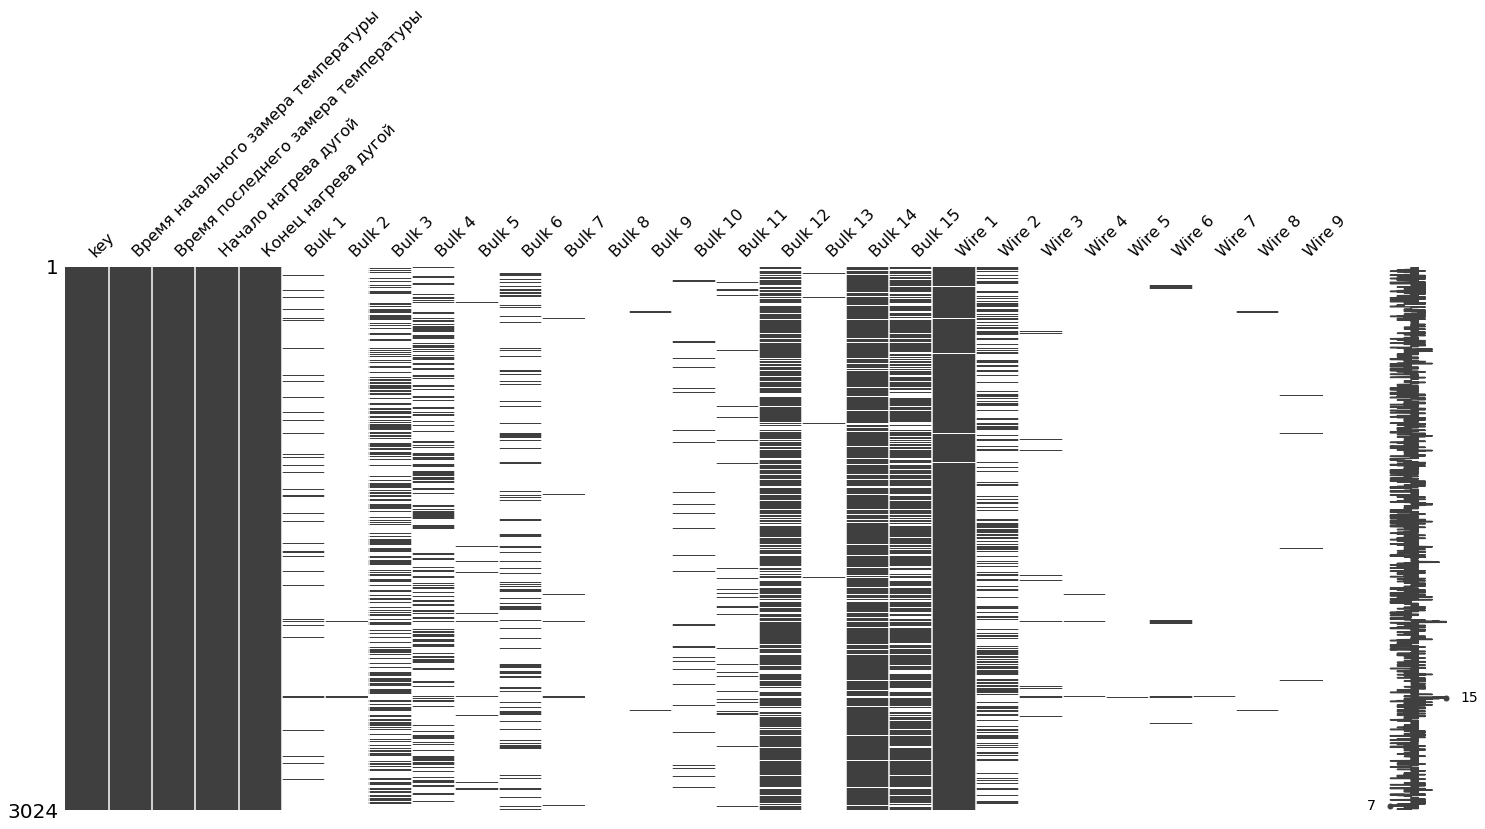

In [95]:
msno.matrix(total_time);

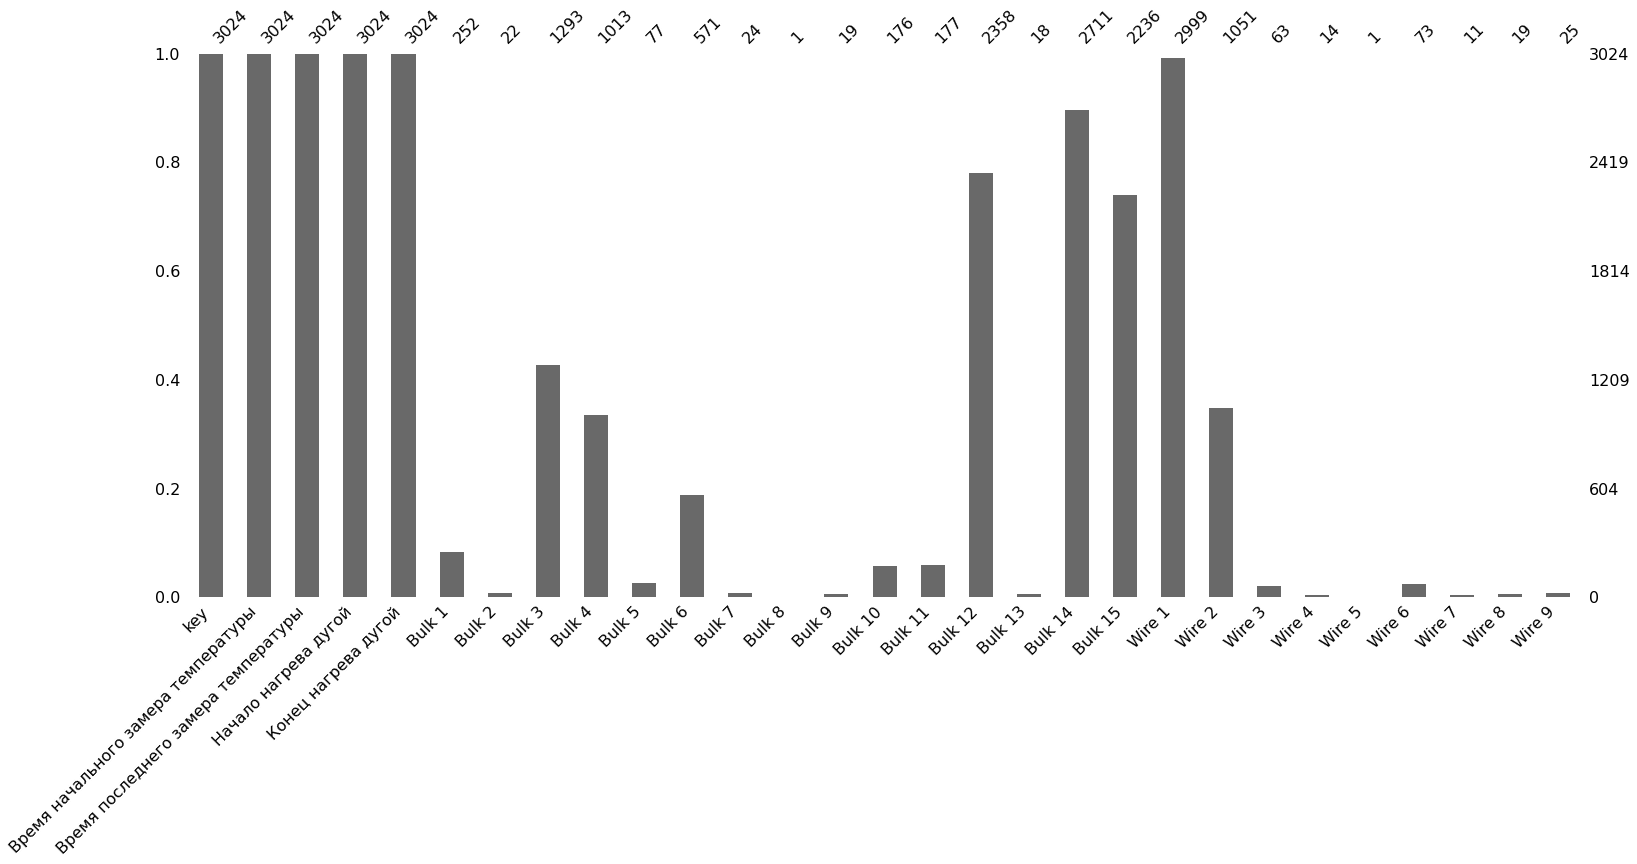

In [96]:
msno.bar(total_time);

In [97]:
total_time_columns = total_time.select_dtypes('datetime').columns
total_time_columns

Index(['Время начального замера температуры',
       'Время последнего замера температуры', 'Начало нагрева дугой',
       'Конец нагрева дугой', 'Bulk 1', 'Bulk 2', 'Bulk 3', 'Bulk 4', 'Bulk 5',
       'Bulk 6', 'Bulk 7', 'Bulk 8', 'Bulk 9', 'Bulk 10', 'Bulk 11', 'Bulk 12',
       'Bulk 13', 'Bulk 14', 'Bulk 15', 'Wire 1', 'Wire 2', 'Wire 3', 'Wire 4',
       'Wire 5', 'Wire 6', 'Wire 7', 'Wire 8', 'Wire 9'],
      dtype='object')

In [98]:
total_time['max'] = total_time['Время последнего замера температуры'] >= total_time[total_time_columns].max(axis=1)
max_time = len(total_time[total_time['max'] == False][total_time_columns])

print(f'Количество партий с нарушением времени замера температуры в конце каждого этапа: {max_time}')

Количество партий с нарушением времени замера температуры в конце каждого этапа: 0


In [99]:
total_time['min'] = total_time['Время начального замера температуры'] <= total_time[total_time_columns].min(axis=1)
min_time = len(total_time[total_time['min'] == False][total_time_columns])

print(f'Количество партий с нарушением времени замера температуры в начале каждого этапа: {min_time}')

Количество партий с нарушением времени замера температуры в начале каждого этапа: 0


Создадим основной общий датафрейм - объеденим данные по ключу `key`.

In [100]:
data_names = [data_bulk_new, data_gas_new, data_temp_group, data_wire_new]
total = arc_group
for data in data_names:
    total = total.merge(data, on=['key'])
display(total.head().style.background_gradient(cmap='Reds', axis=0).hide_index())

key,Количество циклов нагрева,Активная мощность,Реактивная мощность,Полная мощность,Время нагрева дугой,Работа,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15,Bulk sum,Газ 1,Начальная температура,Минимальная температура,Окончательная температура,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
1,5,0.607346,0.428564,0.743747,1098,770.282114,0.000000,0.000000,0.000000,43.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,0.000000,150.000000,154.000000,554.000000,29.749986,1571,1571,1613,60.059998,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,4,0.534852,0.363339,0.647087,811,481.760005,0.000000,0.000000,0.000000,73.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,0.000000,149.000000,154.000000,584.000000,12.555561,1581,1577,1602,96.052315,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,5,0.812728,0.587491,1.003845,655,722.837668,0.000000,0.000000,0.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,205.000000,0.000000,152.000000,153.000000,547.000000,28.554793,1596,1596,1599,91.160157,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,4,0.676622,0.514248,0.850010,741,683.455597,0.000000,0.000000,0.000000,81.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,207.000000,0.000000,153.000000,154.000000,599.000000,18.841219,1601,1601,1625,89.063515,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,4,0.563238,0.421998,0.704245,869,512.169934,0.000000,0.000000,0.000000,78.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,203.000000,0.000000,151.000000,152.000000,589.000000,5.413692,1576,1576,1602,89.238236,9.114560,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [101]:
excess = (len(arc_group) - len(total.merge(total_time, on=['key']))) / len(arc_group) * 100
print('После предобработки было удалено', round(excess,2), '% исходных данных')

После предобработки было удалено 27.66 % исходных данных


- Данные объединены в две таблицы по времени и без учета времени проведения работ.
- Произведена проверка на корректность операций по замеру температуры в начале и в конце каждого этапа.  
- По завершении этапа предобработки удалено 27.5 % исходных данных.

## Исследовательский анализ и предобработка данных объединённого датафрейма

In [102]:
corr_data=pd.Series()
for i in total.columns:
    corr_data[i] = abs(total['Окончательная температура'].corr(total[i]))
corr_data= corr_data.sort_values(ascending=False)[1:]

/tmp/ipykernel_153/3281193306.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  corr_data=pd.Series()


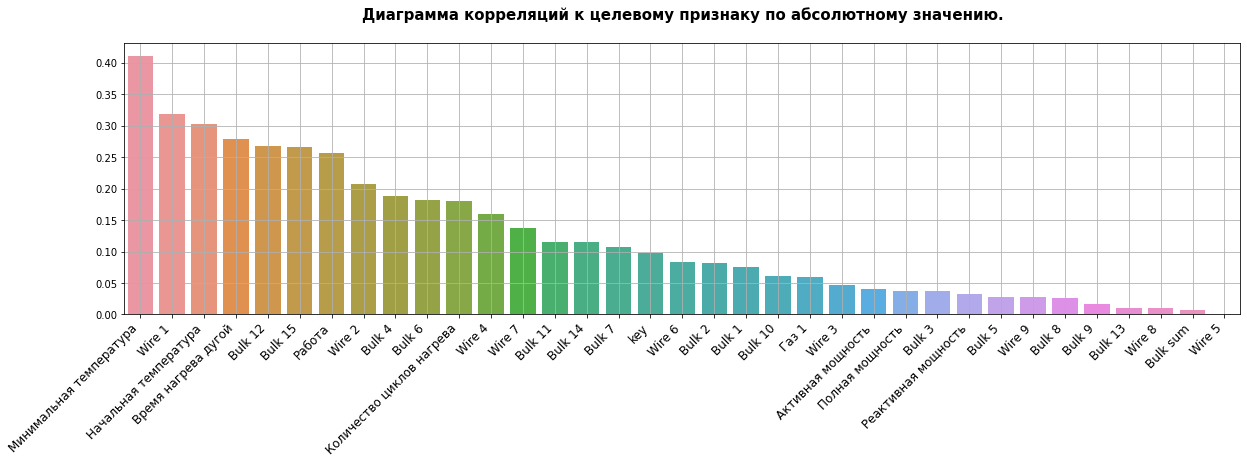

In [103]:
plt.figure(figsize=(20,5))
sns.barplot(x=corr_data.index, y=corr_data.values)
plt.title('Диаграмма корреляций к целевому признаку по абсолютному значению.\n ', fontsize=15, fontweight="bold")
plt.grid()
plt.xticks(rotation=45, horizontalalignment='right', fontsize=12)
plt.show()

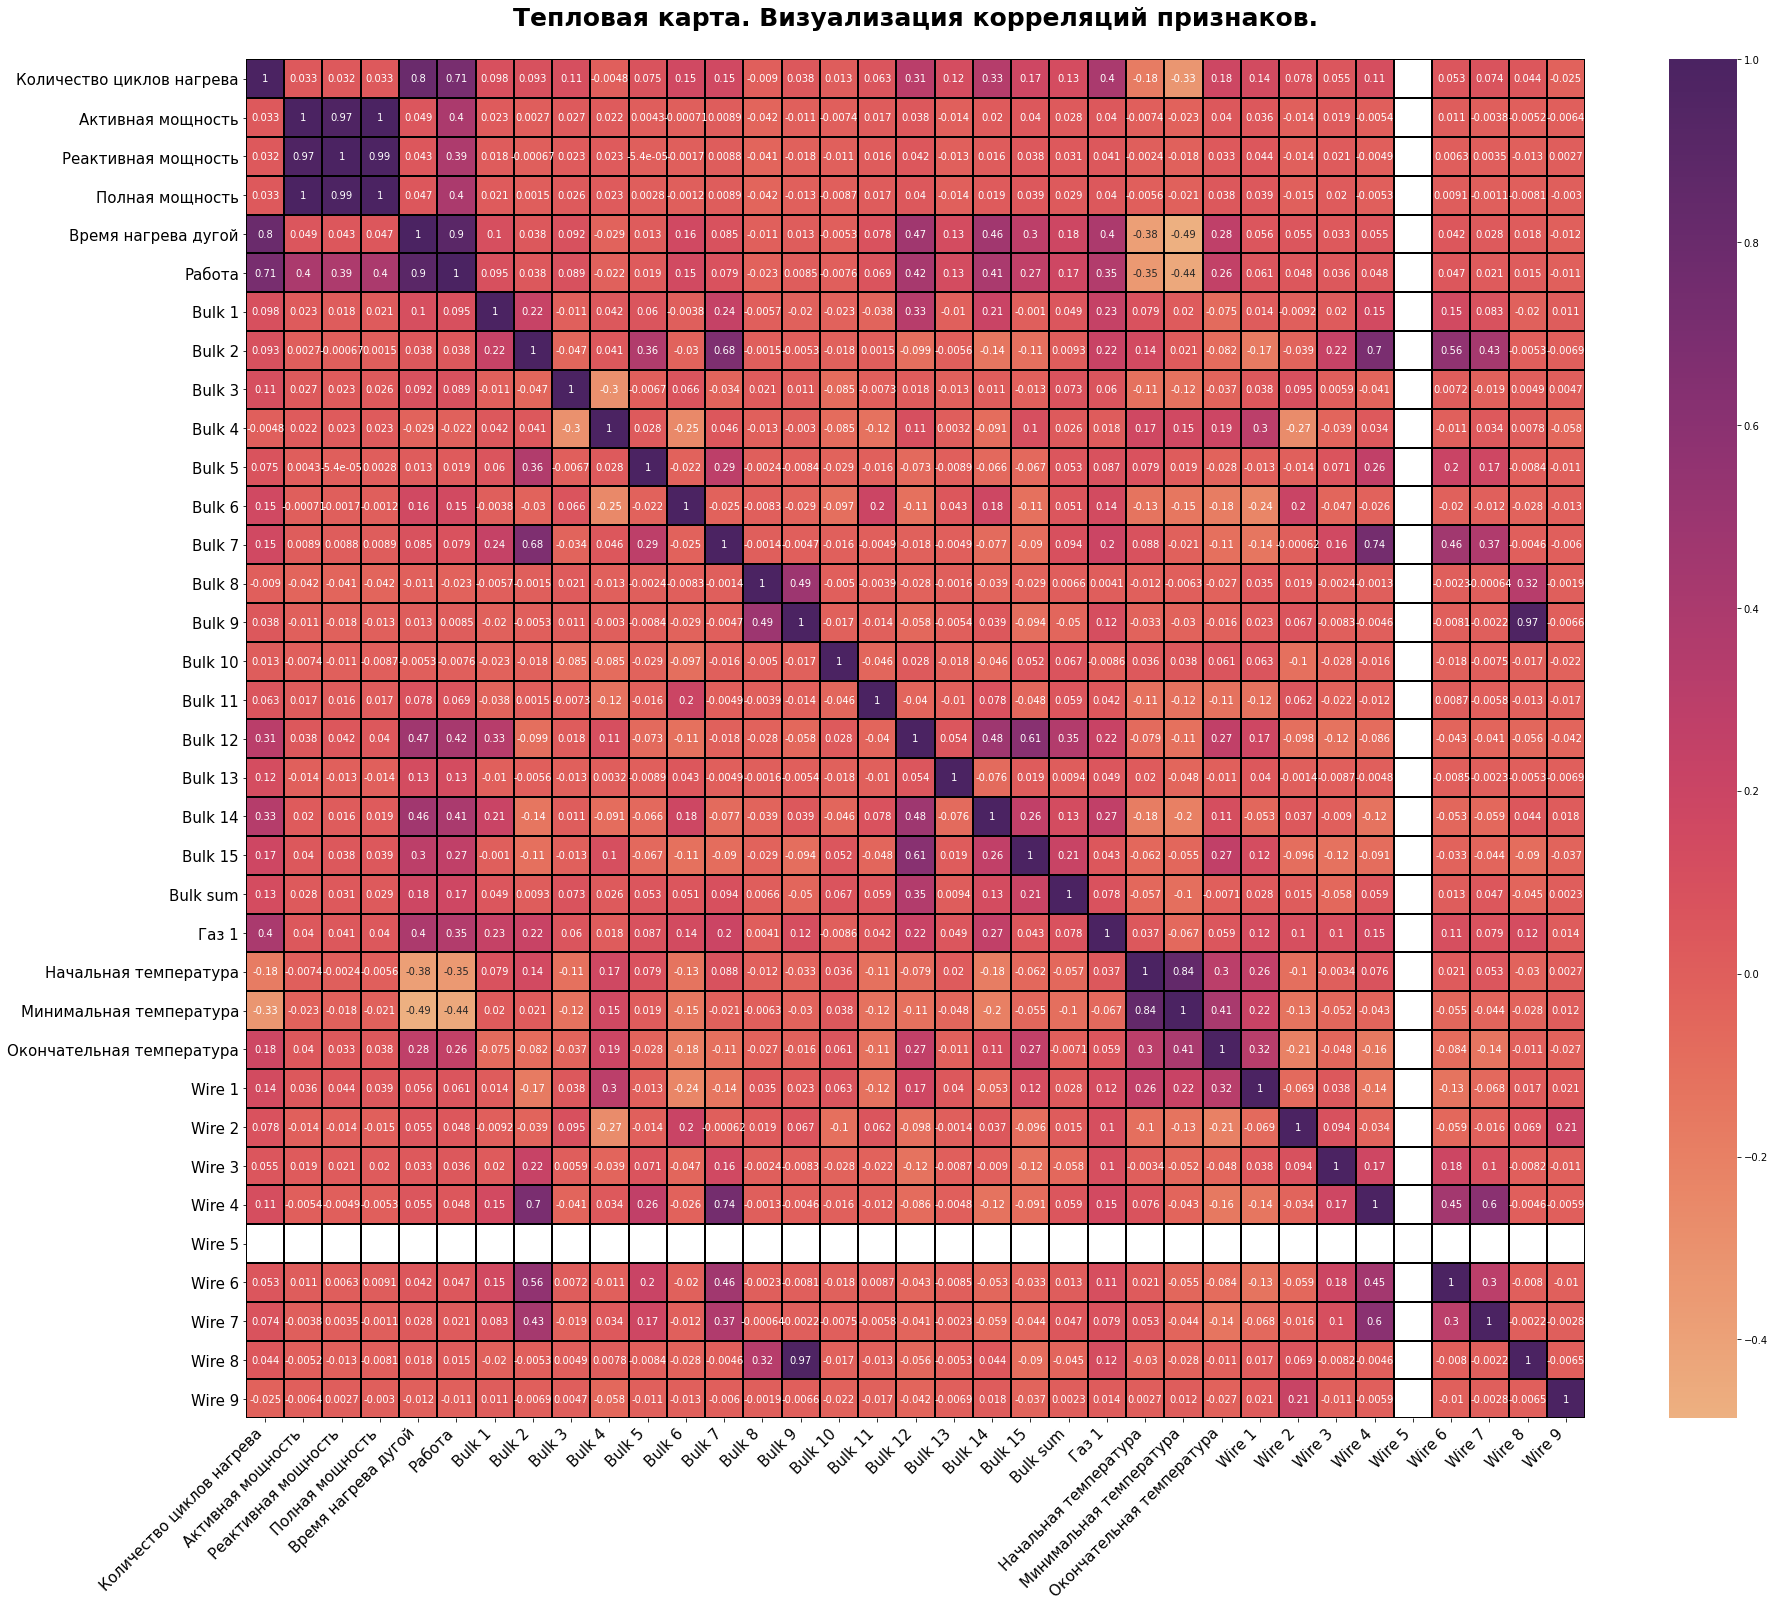

In [104]:
file = total.drop(['key'], axis=1)
plt.figure(figsize=(30, 25))
colormap = sns.color_palette("flare", as_cmap=True)
chart = sns.heatmap(file.corr(), annot=True, cmap=colormap, linewidths=1, linecolor='black')
plt.title('Тепловая карта. Визуализация корреляций признаков.\n ', fontsize=25, fontweight="bold")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=15)
chart.set_yticklabels(chart.get_xticklabels(), horizontalalignment='right', fontsize=15)
plt.show()

Наблюдается очень высокую корреляцию признаков:
- Активной, Реактивной и Полной мощностей (`r` = 0.97-1);
- Временем нагрева дугой и Работой (`r` = 0.9);
- Wire 8 и Bulk 9 (`r` = 0.97) 

Удалим перед обучением признаки `Реактивная мощность`, `Полная мощность`, `Время нагрева дугой` и `Bulk 9` чтобы устранить мультиколлинеарность.   
Также удалим признак Wire 5.

## Подготовка данных

In [105]:
col = list(total)
print('Целевой признак: \n\nОкончательная температура \n')
del_col = ['Окончательная температура', 'key', 'Реактивная мощность',
           'Полная мощность', 'Время нагрева дугой', 'Bulk 9', 'Wire 5'
          ]
for value in del_col:
    col.remove(value)

print('Используемые для обучения признаки: \n')
for i in col:
    print(i)

Целевой признак: 

Окончательная температура 

Используемые для обучения признаки: 

Количество циклов нагрева
Активная мощность
Работа
Bulk 1
Bulk 2
Bulk 3
Bulk 4
Bulk 5
Bulk 6
Bulk 7
Bulk 8
Bulk 10
Bulk 11
Bulk 12
Bulk 13
Bulk 14
Bulk 15
Bulk sum
Газ 1
Начальная температура
Минимальная температура
Wire 1
Wire 2
Wire 3
Wire 4
Wire 6
Wire 7
Wire 8
Wire 9


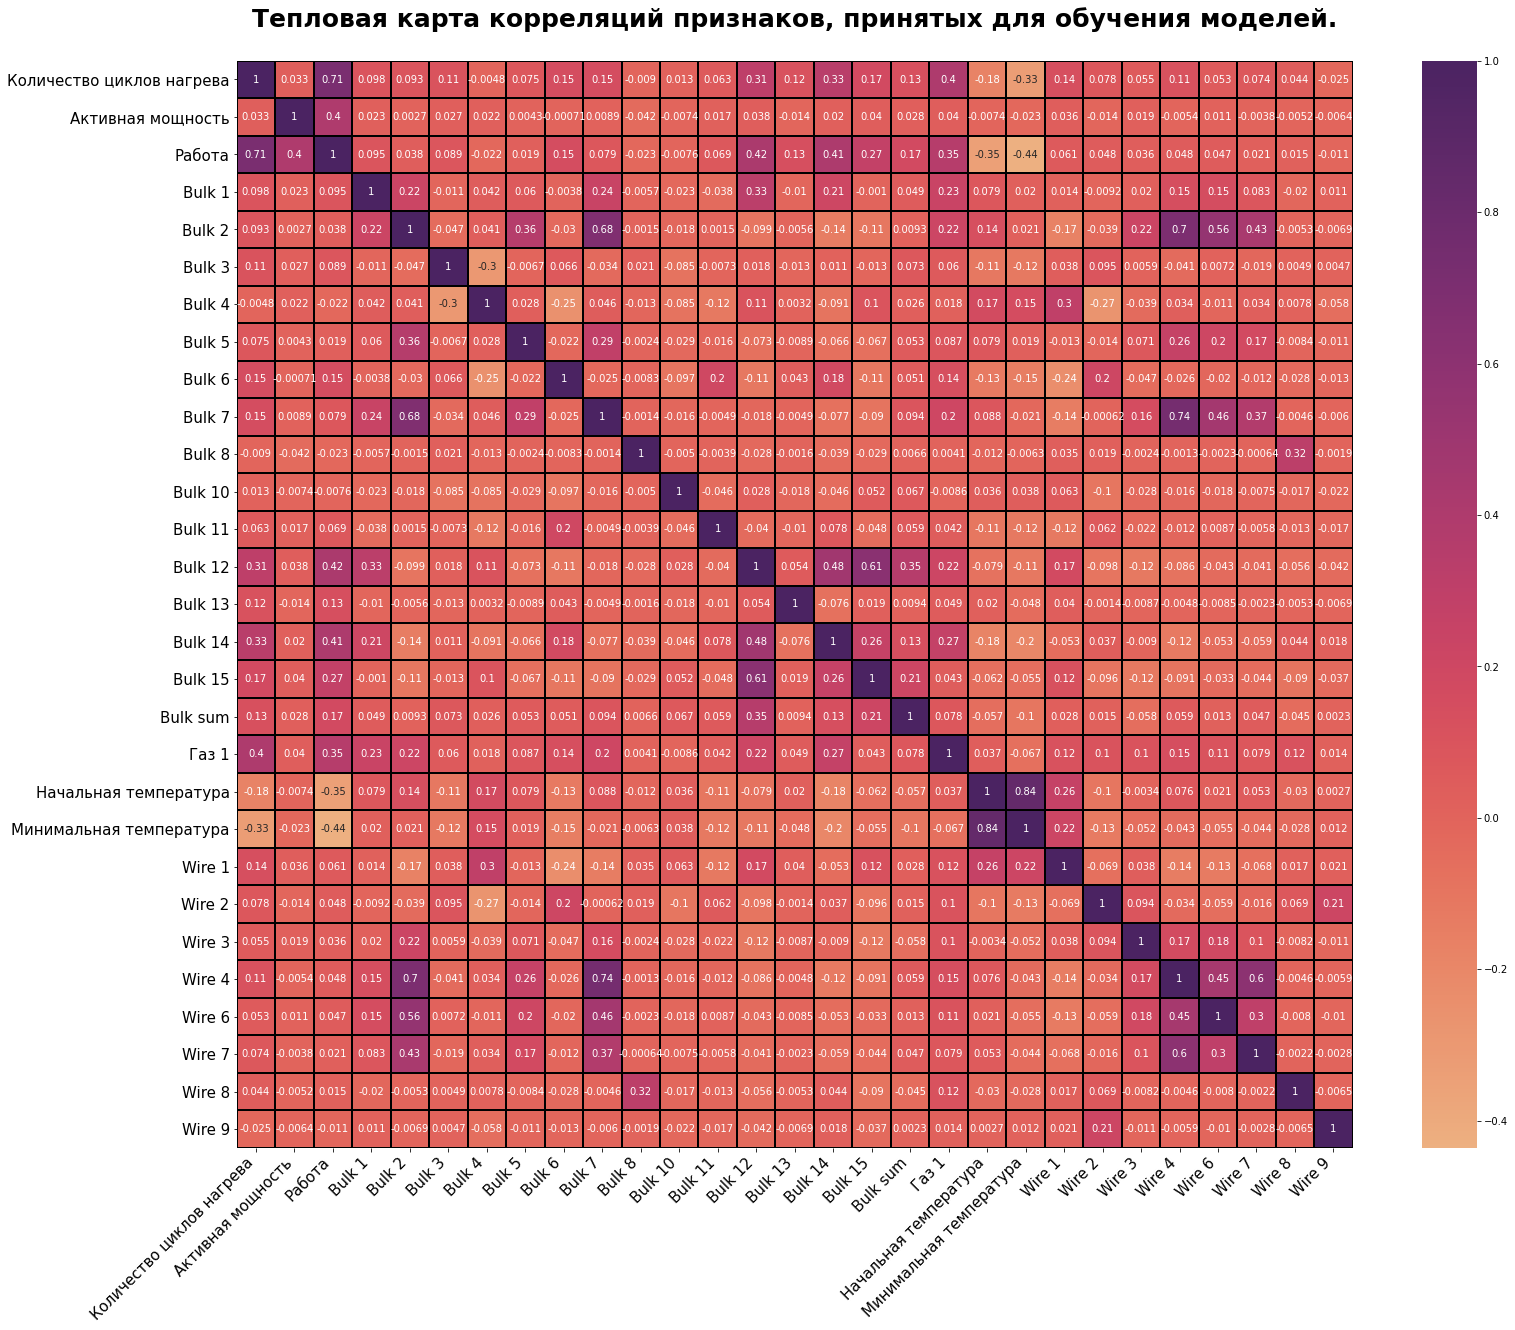

In [106]:
file = total[col]
plt.figure(figsize=(25, 20))
colormap = sns.color_palette("flare", as_cmap=True)
chart = sns.heatmap(file.corr(), annot=True, cmap=colormap, linewidths=1, linecolor='black')
plt.title('Тепловая карта корреляций признаков, принятых для обучения моделей.\n ', fontsize=25, fontweight="bold")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=15)
chart.set_yticklabels(chart.get_xticklabels(), horizontalalignment='right', fontsize=15)
plt.show()

## Обучение моделей машинного обучения

In [107]:
X = total[col]
y = total['Окончательная температура']

RANDOM_STATE = 160924
TEST_SIZE = 0.25

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=TEST_SIZE,
                                                    random_state=RANDOM_STATE
                                                   )

Произведена подготовка данных.  
Для дальнейшего обучения моделей данные разделены на обучающую и тестовые выборки в соотношении 3:1.

In [108]:
# Масштабируем выборки

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [109]:
X_train_scaled = pd.DataFrame(X_train_scaled, index=y_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, index=y_test.index)

# Убедимся, что индексы выборок X совпадают с соответствующими индексами выборок y

print(X_train_scaled.index.equals(y_train.index))  
print(X_test_scaled.index.equals(y_test.index))  

True
True


### Линейная регрессия

In [110]:
model_lr = LinearRegression()
mae_lr = round(abs(cross_val_score(model_lr,
                                   X=X_train_scaled,
                                   y=y_train,
                                   cv=5,
                                   scoring='neg_mean_absolute_error')).mean(), 3)
print('Значение метрики MAE для LinearRegression = ', mae_lr)

Значение метрики MAE для LinearRegression =  5.942


### Случайный лес

In [111]:
model = RandomForestRegressor()
params = {
    'n_estimators': [500, 600, 700],
    'max_depth': [20, 30, 40],
    'min_samples_split': [6, 7, 8],
    'random_state': [RANDOM_STATE]
}
model_rf = GridSearchCV(model, params, cv=5, scoring='neg_mean_absolute_error')
model_rf.fit(X_train, y_train)
print(model_rf.best_params_)

{'max_depth': 30, 'min_samples_split': 7, 'n_estimators': 600, 'random_state': 160924}


In [112]:
mae_rf = round(abs(model_rf.best_score_), 3)
print('Значение метрики MAE для RandomForestRegressor = ', mae_rf)

Значение метрики MAE для RandomForestRegressor =  5.683


### Light Gradient Boosted Machine (LightGBM)

In [113]:
model = LGBMRegressor() 
parameters = [{'learning_rate':[0.04, 0.05, 0.06], 'max_depth': [13, 14, 15], 'random_state':[RANDOM_STATE]}]
model_lgbmr = GridSearchCV(model, parameters, scoring='neg_mean_absolute_error')
model_lgbmr.fit(X_train, y_train)
print(model_lgbmr.best_params_)

{'learning_rate': 0.05, 'max_depth': 14, 'random_state': 160924}


In [114]:
mae_lgbmr = round(abs(model_lgbmr.best_score_), 3)
print('Значение метрики MAE для LGBMRegressor = ', mae_lgbmr)

Значение метрики MAE для LGBMRegressor =  5.501


### Модель CatBoost

In [115]:
model = CatBoostRegressor() 
parameters = [{'learning_rate':[0.01, 0.02, 0.03], 'random_state':[RANDOM_STATE], 'verbose':[False]}]
model_cbr = GridSearchCV(model, parameters, scoring='neg_mean_absolute_error')
model_cbr.fit(X_train, y_train)
print(model_cbr.best_params_)

{'learning_rate': 0.02, 'random_state': 160924, 'verbose': False}


In [116]:
mae_cbr = round(abs(model_cbr.best_score_), 3)
print('Значение метрики MAE для CatBoostRegressor = ', mae_cbr)

Значение метрики MAE для CatBoostRegressor =  5.49


### Медианная константная модель

In [117]:
median_value = y_train.median()

y_pred_const = []
for _ in range(len(y_test)):
    y_pred_const.append(median_value)

mae_const = mean_absolute_error(y_test, y_pred_const)

print(f"MAE константной модели (медиана): {round(mae_const, 3)}")

MAE константной модели (медиана): 7.643


## Выбор лучшей модели

In [118]:
data = {'Значения MAE на обучающей выборке':[mae_lr, mae_rf, mae_lgbmr, mae_cbr, mae_const]}
index = ['LinearRegression', 'RandomForestRegressor', 'LGBMRegressor', 'CatBoostRegressor', 'Константная модель']
data_final = pd.DataFrame(data=data, index=index)
display(data_final.sort_values(by='Значения MAE на обучающей выборке',
                               ascending=True).style.background_gradient(cmap='Blues',
                                                                         axis=0)
       )

,Значения MAE на обучающей выборке
CatBoostRegressor,5.490000
LGBMRegressor,5.501000
RandomForestRegressor,5.683000
LinearRegression,5.942000
Константная модель,7.642612


Научший результат показала модель CatBoostRegressor (MAE = 5.49).
Проведена проверка на адекватность константной моделью - её значение MAE существенно уступает остальным моделям.

In [119]:
model_cbr = CatBoostRegressor(learning_rate=0.02, random_state=RANDOM_STATE, verbose=False)
model_cbr.fit(X_train, y_train)
y_pred = model_cbr.predict(X_test)
mae_cbr = round(mean_absolute_error(y_test, y_pred), 3)
print('Значение метрики MAE для CatBoostRegressor на тестовой выборке = ', mae_cbr)

Значение метрики MAE для CatBoostRegressor на тестовой выборке =  5.047


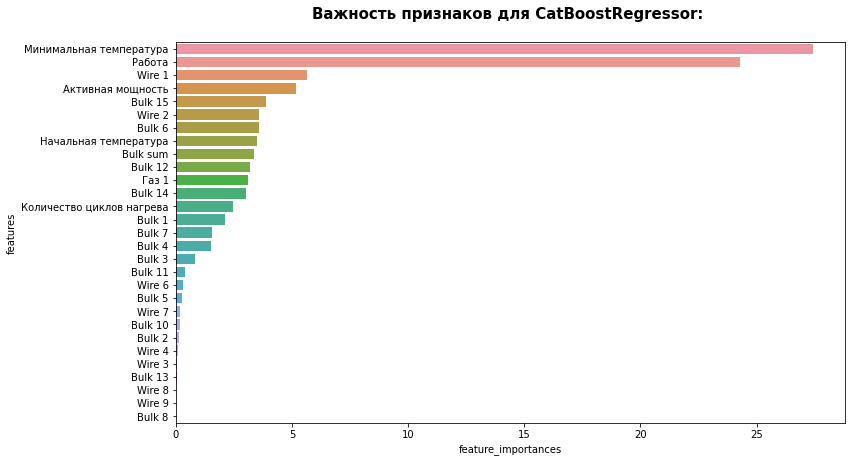

In [120]:
plot_data = {
    'features': X_test.columns,
    'feature_importances': model_cbr.feature_importances_,
}
plot_data = pd.DataFrame(plot_data)
plot_data.sort_values(by='feature_importances', ascending=False, inplace=True)
plt.figure(figsize=(12, 7))
sns.barplot(x=plot_data['feature_importances'], y=plot_data['features'])
plt.title('Важность признаков для CatBoostRegressor: \n', fontsize=15, fontweight="bold")
plt.show()

Top-10 наиболее значимых признаков для модели CatBoostRegressor:  

- Минимальная температура
- Работа (затраты электроэнергии)
- Wire 1
- Активная мощность
- Газ 1
- Начальная температура
- Bulk sum (общий объем добавленного сыпучего материала)
- Bulk 15
- Bulk 14
- Bulk 12

## Общий вывод и рекомендации заказчику

**В результате работы над проектом:** 

- Данные были загружены корректно. Произведена обработка пропущенных значений и аномалий. Аномальное значение реактивной мощности в партии №2116 заменено линейно интерполируемым значением.
- Добавлены дополнительные признаки: `Количество циклов нагрева`, `Время нагрева дугой`, `Минимальная температура` и `Начальная температура`.
- Добавлены признаки `Полная мощность` и `Затраты электроэнергии`, рассчитанные по формулам.
- Добавлен признак общего объема добавленного сыпучего материала - `Bulk sum`.
- Удалены партии с начальной температурой ниже технологического регламента (1400°С).
- Удалены партии с пропусками в замерах температуры.
- В процессе исследовательского анализа было удалено 27.5% исходных данных.
- Проведен корреляционный анализ, построена матрица корреляций. Выявлены и удалены признаки, сильно коррелирующие друг с другом (`r`>=0.9) в целях устранения мультиколлинеарности.
- Для дальнейшего обучения моделей данные разделены на обучающую и тестовые выборки в соотношении 3:1.
- Проверили пять модели: `Линейная регрессия`, `Случайный лес`, `LGBMRegressor`, `CatBoostRegressor` и Медианная константная модель.
- Лучший целевой показатель на тренировочных данных `MAE` = 5.49 показала модель `CatBoostRegressor`.
- Показатель `MAE` для итоговой модели `CatBoostRegressor` на тестовых данных равен 5.047. Таким образом, ошибка модели составляет около 5 градусов.
- Результат метрики `MAE` удовлетворяет условию задачи (`MAE` ≤ 6.8).
- Исследована важность признаков для модели `CatBoostRegressor`: наиболее значимыми оказались добавленные признаки.


В итоге обученная модель `CatBoostRegressor` с принятыми гиперпараметрами готова для прогнозирования температуры стали и может быть рекомендована заказчику.